# Exercise: Understanding Independence and Correlation

## Background Information

1. **Independence of Random Variables**  
   Two random variables $X$ and $Y$ are said to be independent if the occurrence of one does not affect the probability of the other. Mathematically, this means:  
   $$
   P(X \leq x, Y \leq y) = P(X \leq x)P(Y \leq y) \quad \text{for all } x, y.
   $$
   Equivalently, their joint probability density function (pdf) or mass function can be written as the product of their marginal pdfs or mass functions:  
   $$
   f_{X,Y}(x, y) = f_X(x)f_Y(y).
   $$

2. **Correlation**  
   The correlation between two random variables $X$ and $Y$ is a measure of their linear relationship, defined as:  
   $$
   \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}.
   $$
   Here, $\text{Cov}(X, Y)$ is the covariance of $X$ and $Y$, and $\text{Var}(X)$ and $\text{Var}(Y)$ are their variances. If $\rho(X, Y) = 0$, it means there is no linear relationship between $X$ and $Y$, but they may still be dependent.

---

## Task 1a (0.5p)

   Find a specific example of two random variables $X$ and $Y$ such that:
   - $X$ and $Y$ are dependent.
   - The correlation $\rho(X, Y)$ is equal to $0$.

Attach proof, either as markdown code, or photo.


## Task 1b (0.5p)

You are given data file `data.csv`.
- Load the data and do the pairplots of features and target, what can you observe?
- Compute the correlations and plot, the correlation matrix, what can you conclude?
- Train a random forest prediction and plot the histogram of feature importances. How does it align with previous observations?

**Write your answers clearly!**

# 1a:

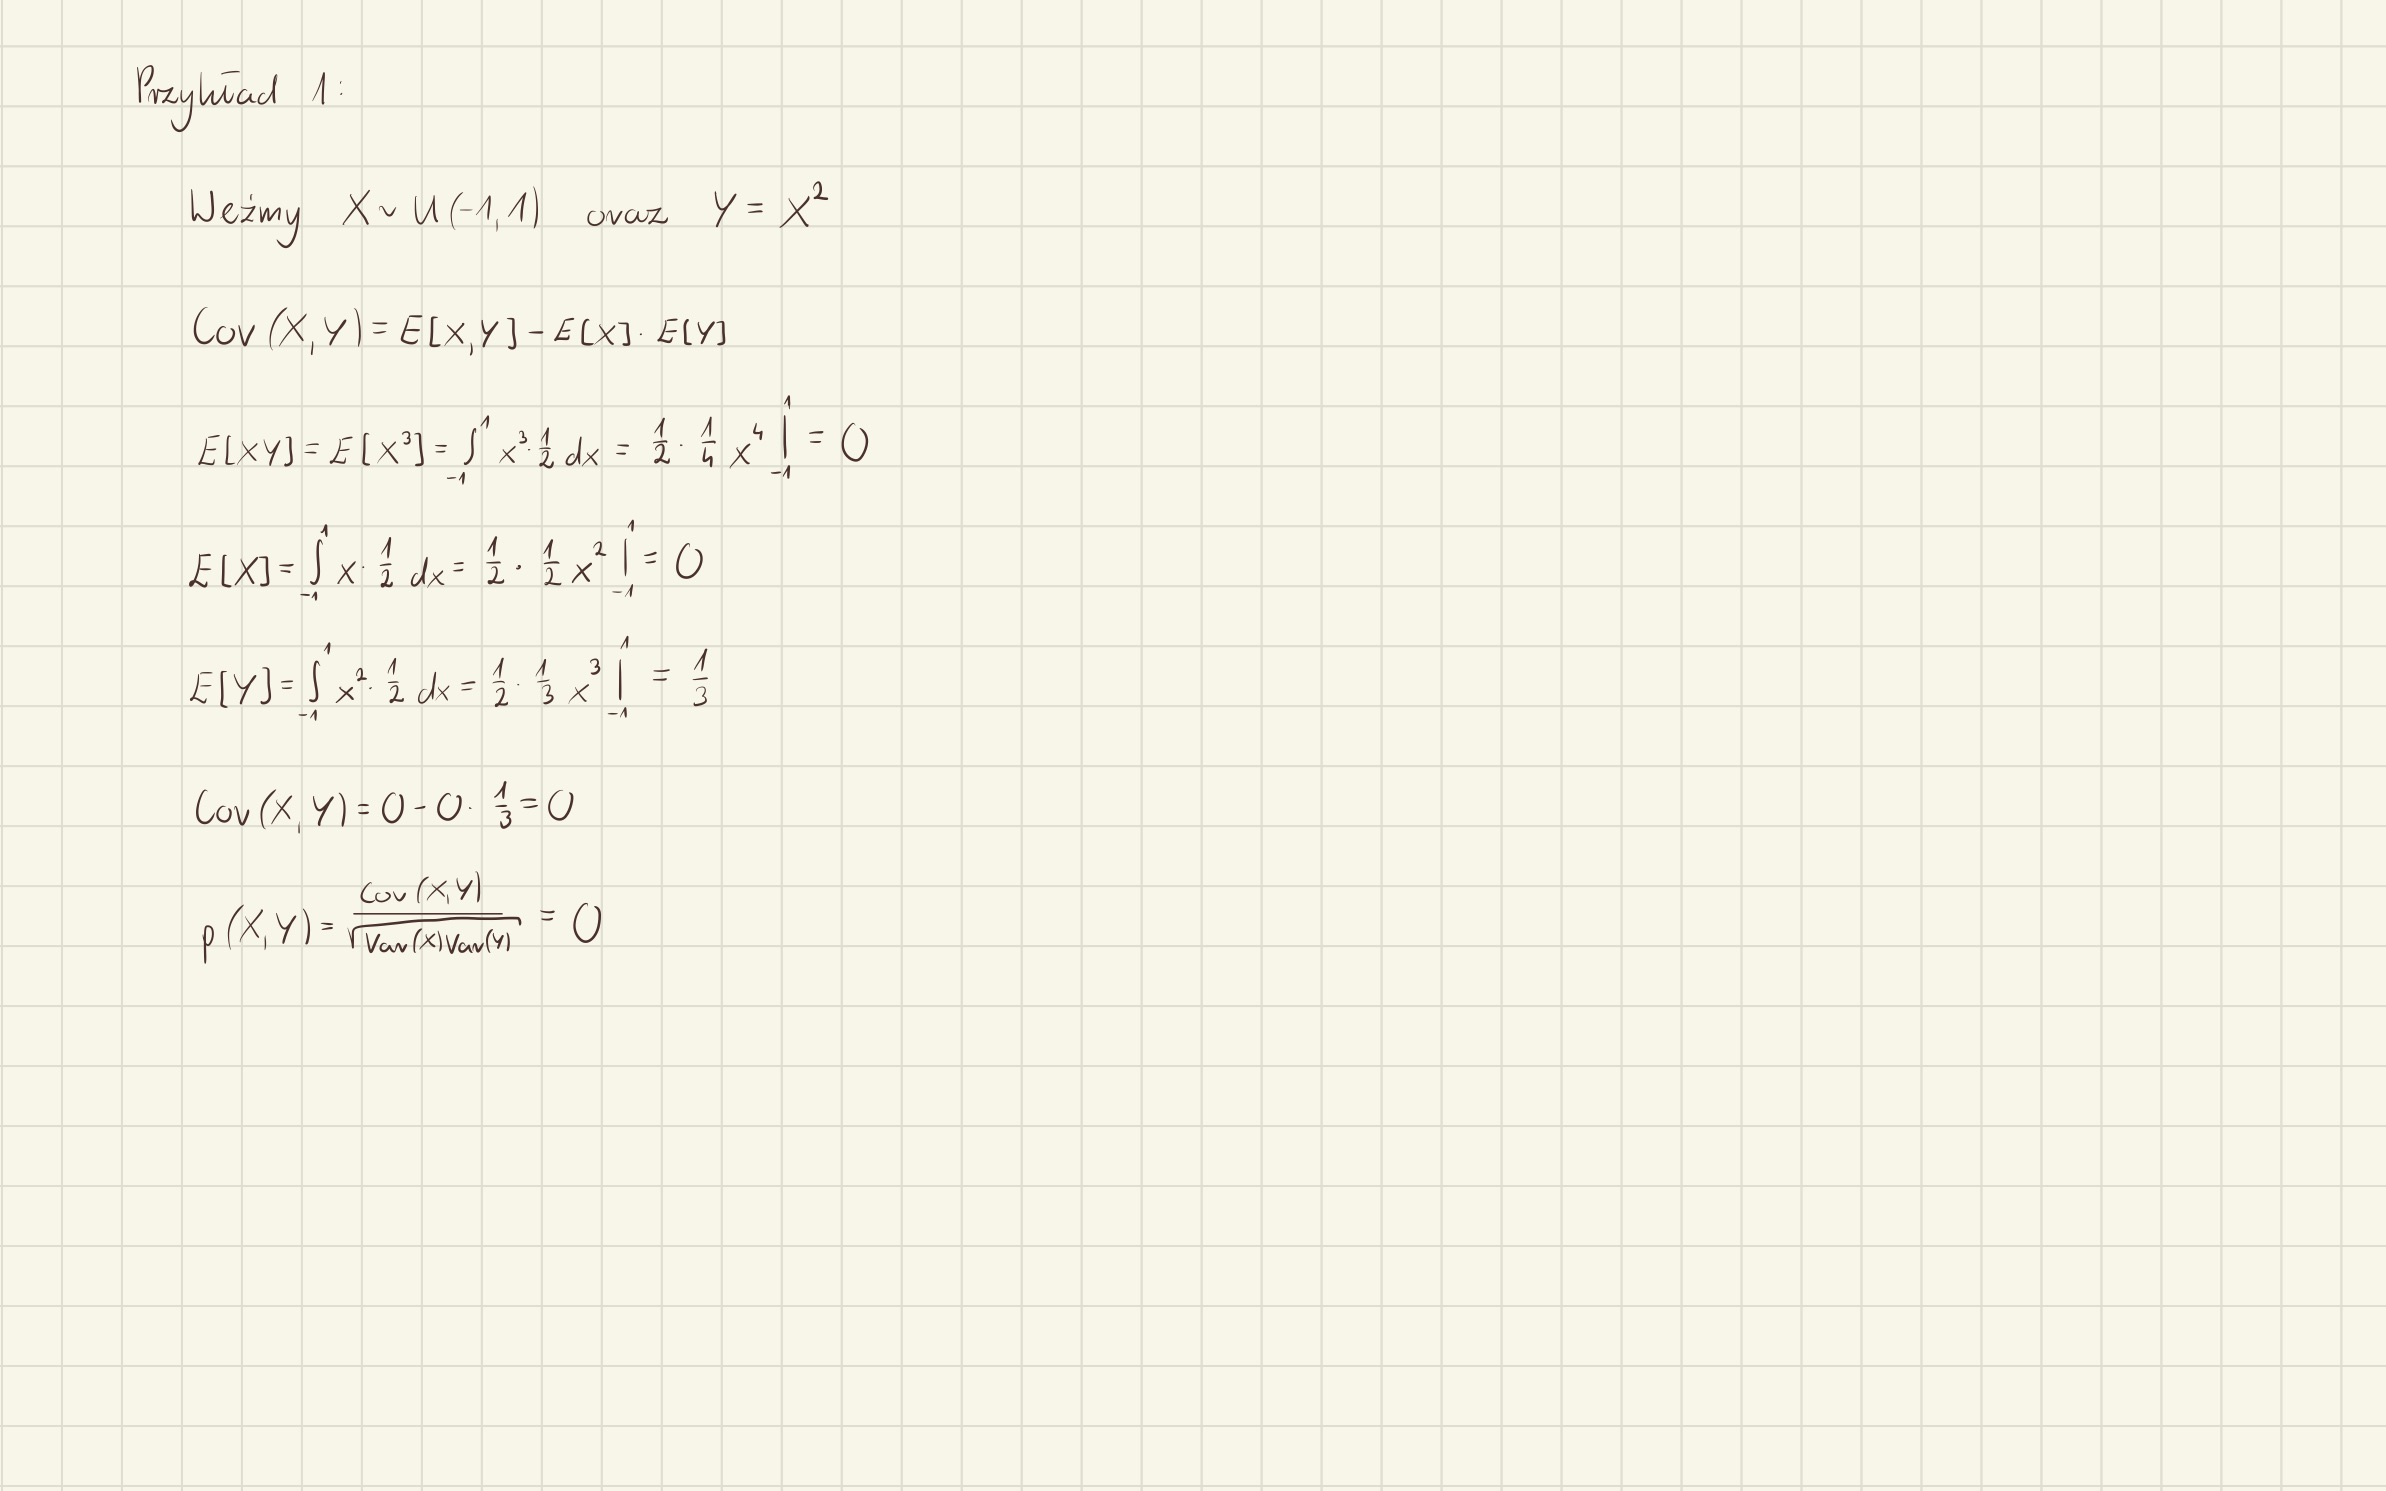

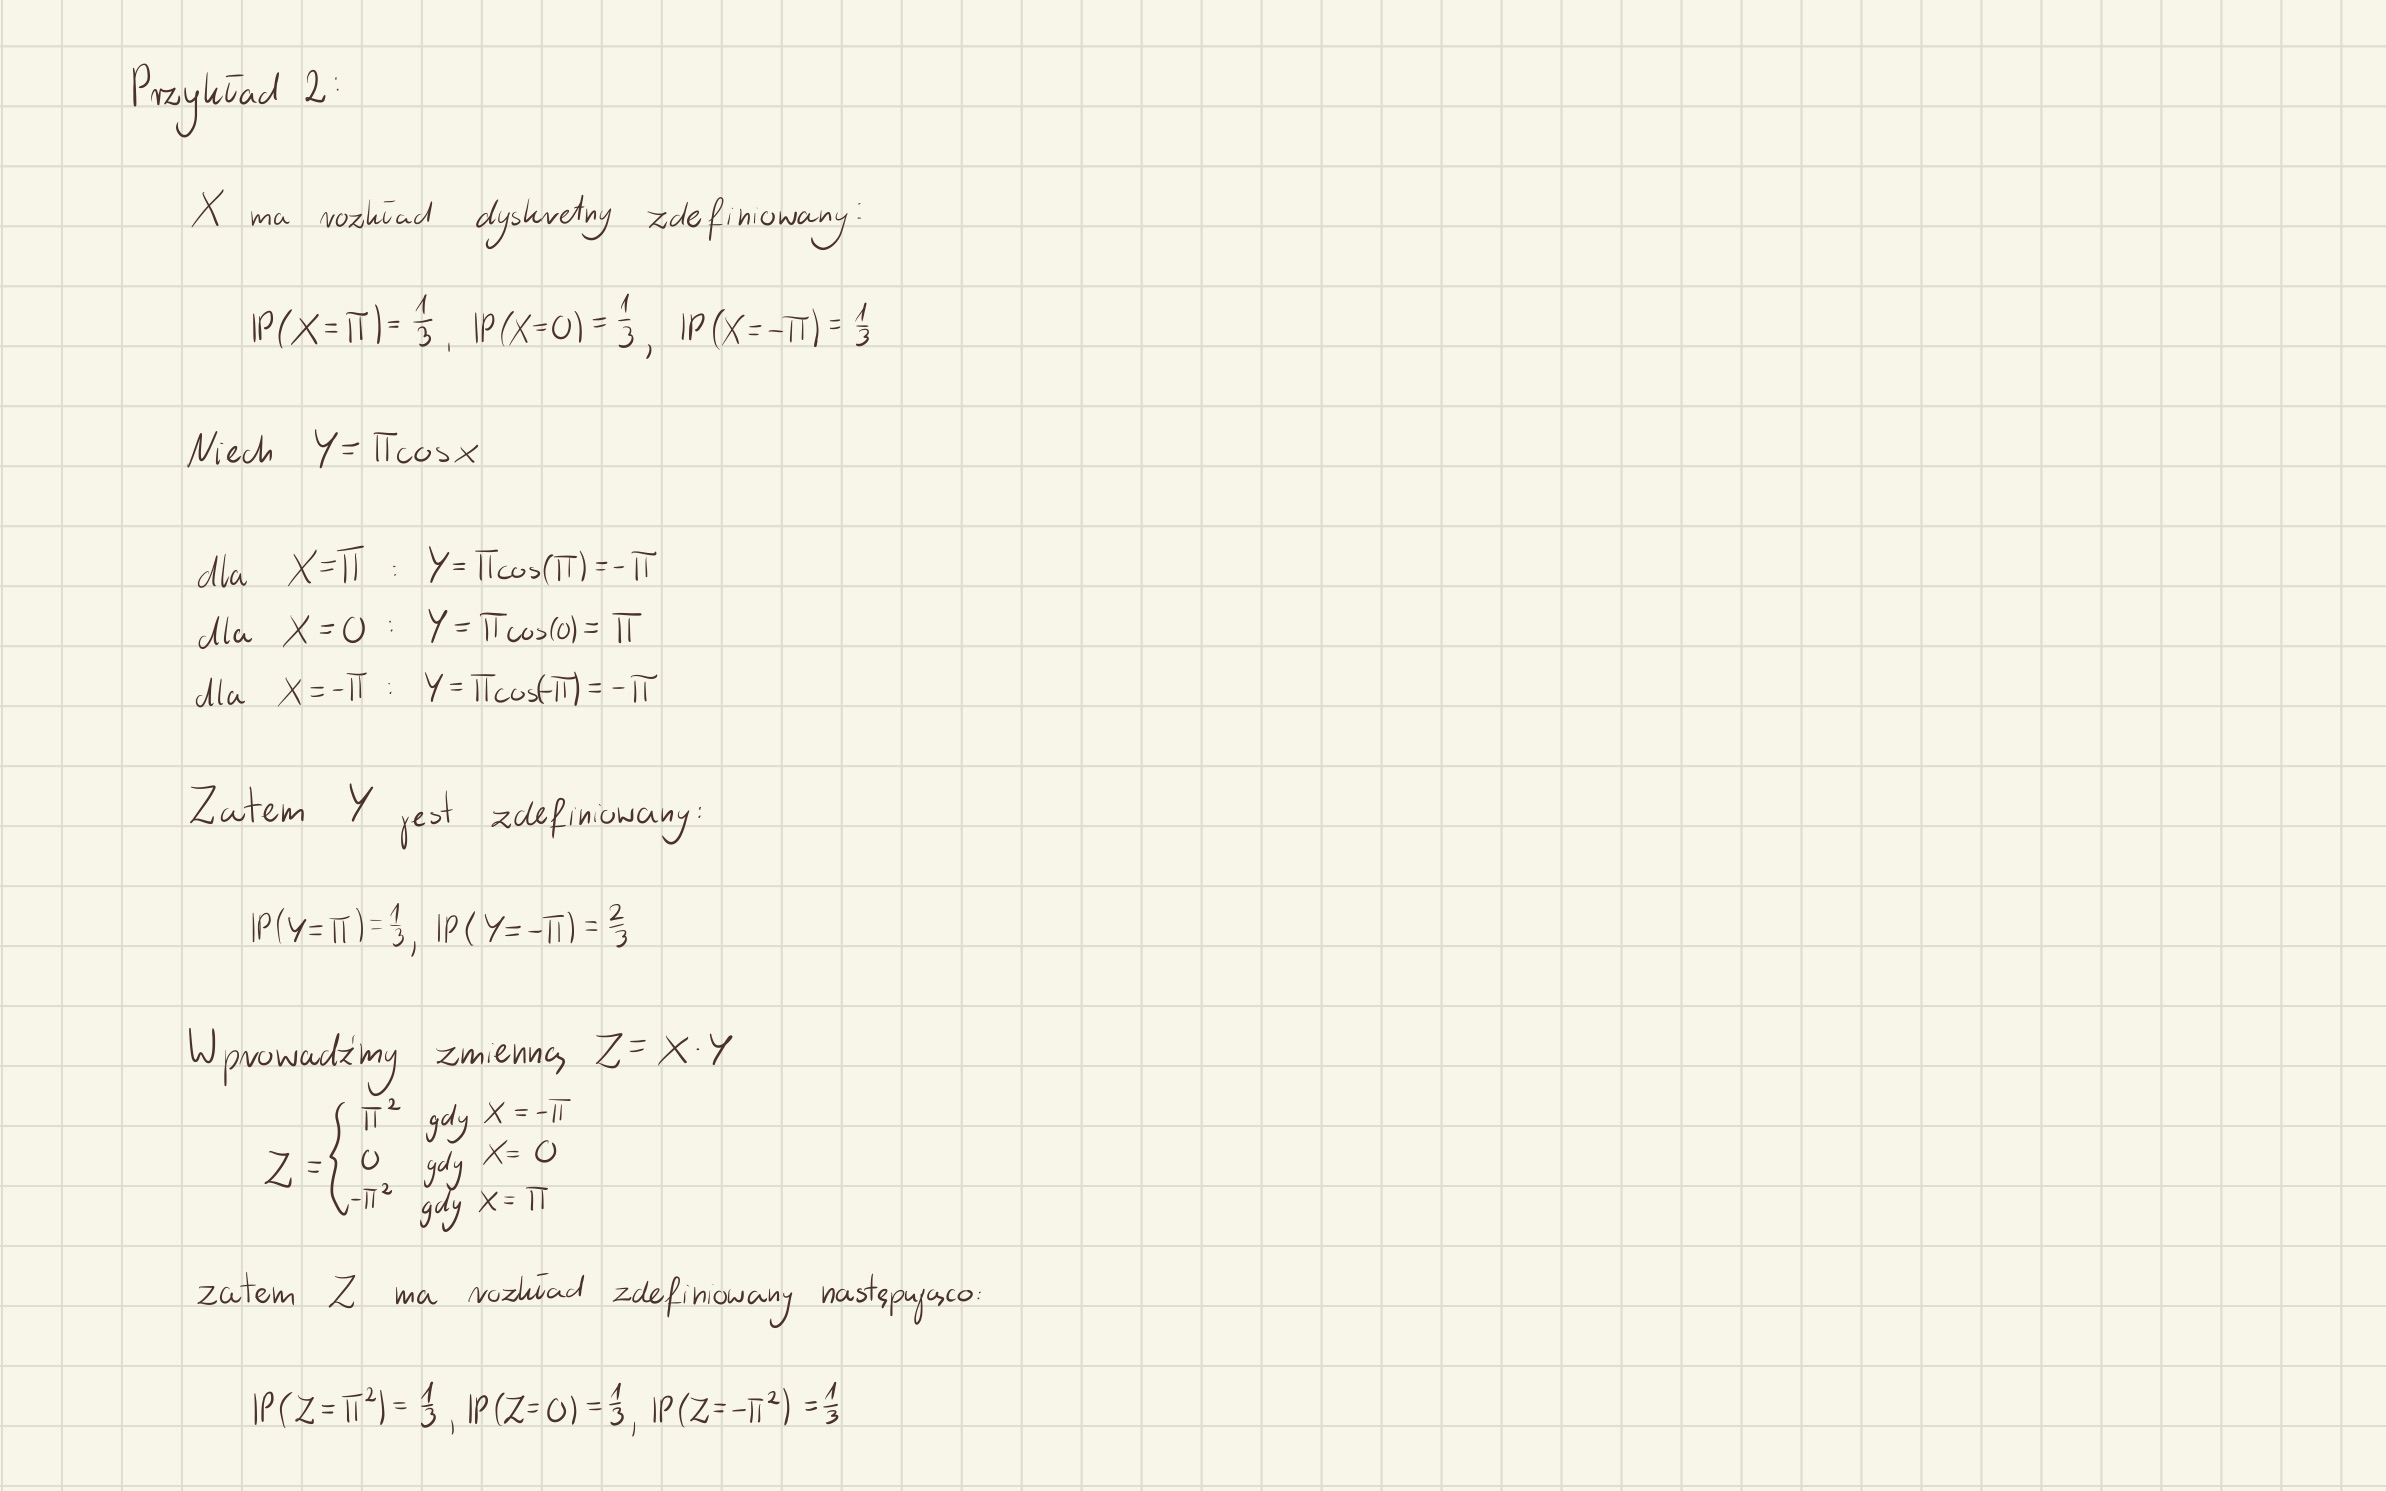

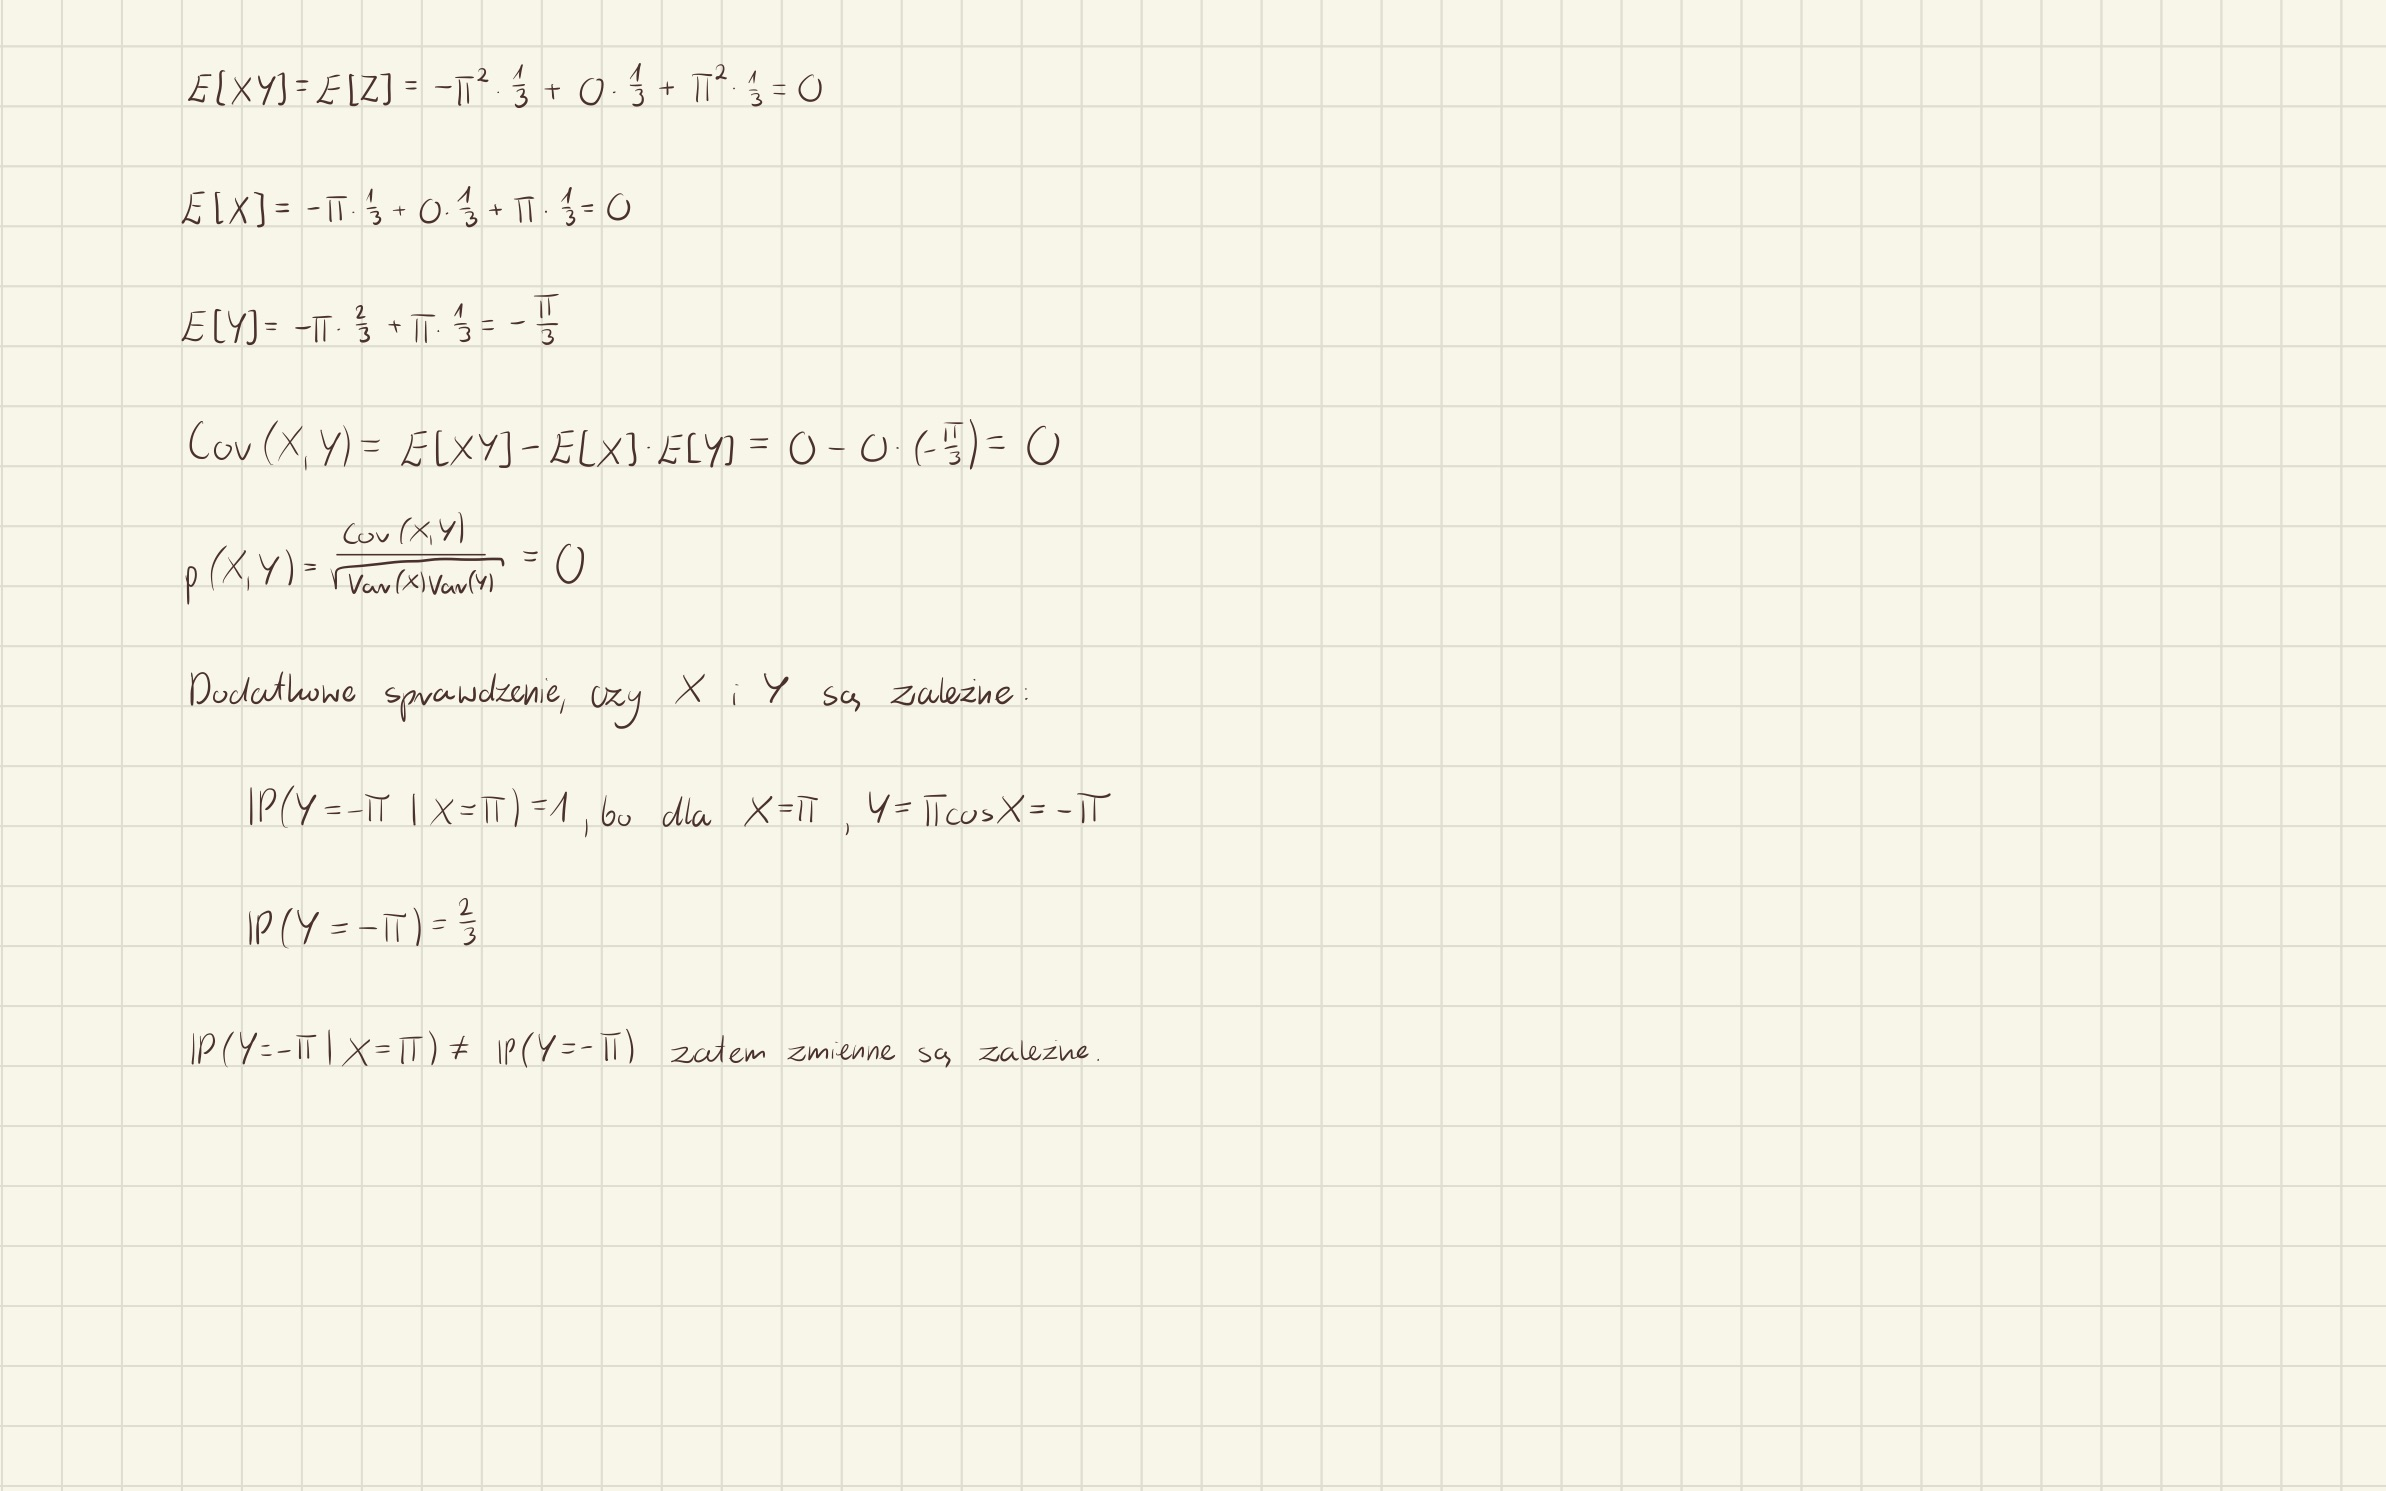

# 1b:

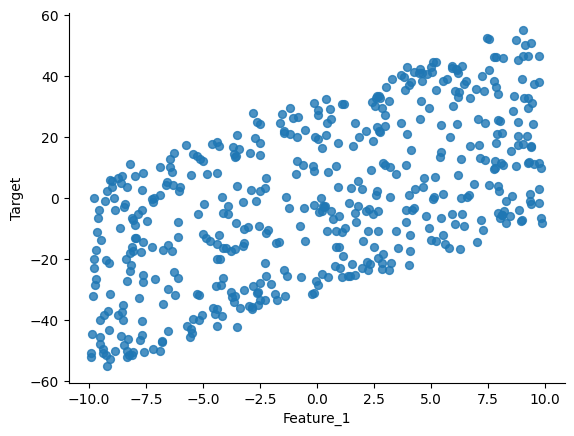

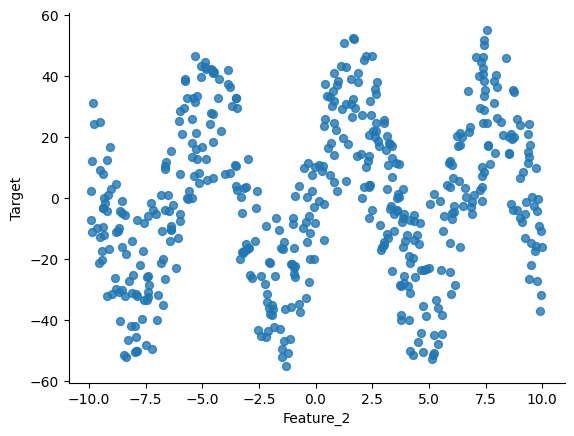

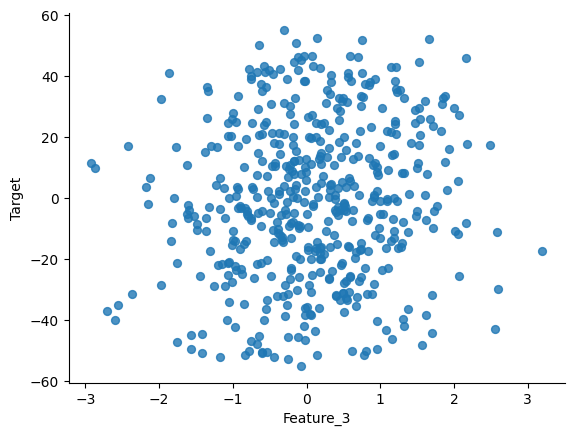

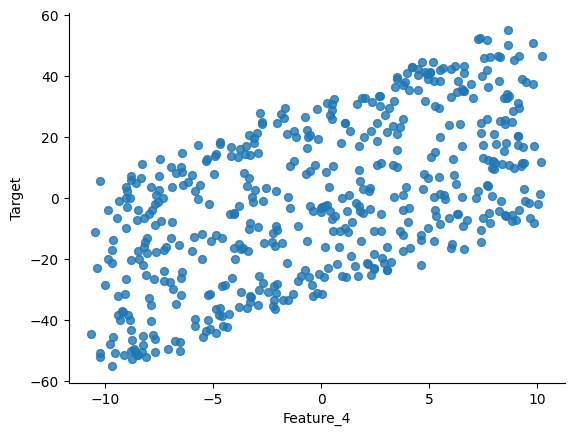

In [ ]:
# @title Features vs Target

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Feature_1', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_2', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_3', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_4', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


Na podstawie wykresów możemy zauważyć, że Feature_2 wykazuje wyraźną korelację z wartością docelową, a jego zależność przypomina kształt funkcji sinusoidalnej.

Feature_1 i Feature_4 wyglądają niemal identycznie. Jednocześnie wykazują one dość silną liniową zależność z targetem, co sugeruje ich przydatność w modelu. Ze względu na ich podobieństwo, w analizie raczej wystarczy uwzględnić tylko jedną z nich.

Z kolei Feature_3 na pierwszy rzut oka wydaje się mieć pewien związek z targetem, ale jego rozkład przypomina rozkład Gaussa, co sugeruje, że może być głównie szumem.

           Feature_1  Feature_2  Feature_3  Feature_4    Target
Feature_1   1.000000   0.044031   0.038552   0.996672  0.600176
Feature_2   0.044031   1.000000  -0.022952   0.042055  0.179238
Feature_3   0.038552  -0.022952   1.000000   0.038521  0.111958
Feature_4   0.996672   0.042055   0.038521   1.000000  0.593566
Target      0.600176   0.179238   0.111958   0.593566  1.000000


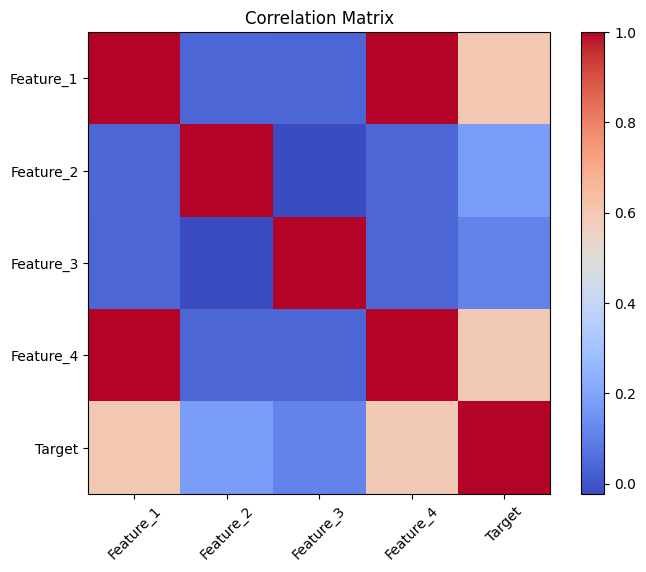

In [ ]:
# prompt: correlations of random features with target

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# ... (Your existing code) ...

# Calculate correlations
correlations = data.corr()

# Print the correlation matrix
print(correlations)

# Visualize the correlations (optional)
plt.figure(figsize=(8, 6))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations)), correlations.columns, rotation=45)
plt.yticks(range(len(correlations)), correlations.columns)
plt.title('Correlation Matrix')
plt.show()

Feature_1 i Feature_4 są do siebie bardzo podobne (korelacja 0.9967), co oznacza, że właściwie niosą tę samą informację. Wystarczy więc użyć tylko jednej z tych cech w modelu. Obie mają dość silną korelację z wartością docelową (0.6002 i 0.5936), więc mogą być przydatne do przewidywania targetu.

Feature_2 ma umiarkowaną korelację z targetem (0.1793), ale wcześniejsze wykresy sugerowały, że jego zależność od wartości docelowej przypomina funkcję sinusoidalną. W takich przypadkach zwykła korelacja liniowa może nie oddawać rzeczywistego wpływu tej cechy, dlatego warto dokładniej to sprawdzić.

Feature_3 jest najsłabiej skorelowany z targetem (0.1119), co potwierdza, że może być tylko przypadkowym szumem. Nie wykazuje też większego związku z innymi cechami, więc prawdopodobnie nie będzie przydatny w modelu.

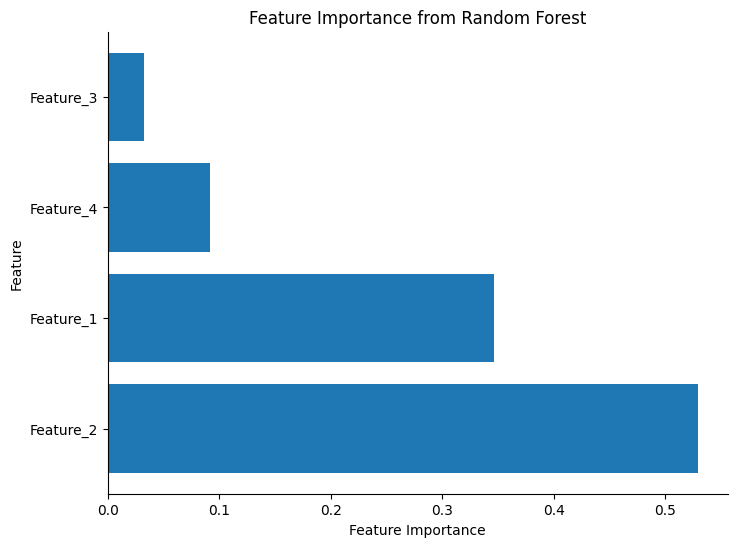

In [ ]:
# prompt: do the same plot as above but ionstead of correlation use feature importance from random forest

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# ... (Your existing code) ...

# Calculate feature importances using RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(data.drop("Target", axis=1), data["Target"])
importances = rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': data.drop("Target", axis=1).columns,
                             'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

Wykres przedstawiający znaczenie cech według modelu Random Forest potwierdza wcześniejsze obserwacje. Feature_2 ma największy wpływ na predykcję, mimo że jego korelacja liniowa z targetem była stosunkowo niska. Oznacza to, że jego zależność z wartością docelową nie jest liniowa, ale nadal istotna dla modelu.

Feature_1 również odgrywa ważną rolę w predykcji, co było zgodne z wcześniejszymi przypuszczeniami. Jego wpływ jest jednak mniejszy niż Feature_2, mimo wyższej korelacji liniowej z targetem.

Feature_4, pomimo wysokiej korelacji z targetem, okazuje się mniej istotne dla modelu. Potwierdza to jego niemal identyczność z Feature_1 – jedna z tych cech staje się mniej przydatna, ponieważ model może korzystać z drugiej.

Feature_3 natomiast nie wnosi żadnej wartości predykcyjnej, co potwierdza, że jest to jedynie losowy szum w danych.

# Problem 2

Consider any dataset $X \in \mathbb{R}_n^d$, where $d$ is the number of columns, and $n$ is the number of samples. Let $\sum_{i=1}^d \mathcal{D}^2 X^i$ be the sum of variances of all the columns. Let $X_{pca} \in \mathbb{R}_n^d$ be the PCA transformed $X$ dataset. Show that $\sum_{i=1}^d \mathcal{D}^2 X^i = \sum_{i=1}^d \mathcal{D}^2 X_{pca}^i$.

Write the proof of this fact below. You can either do it in LaTeX, or you can write it in a reasonably elegant way on a piece of paper and paste an image here.

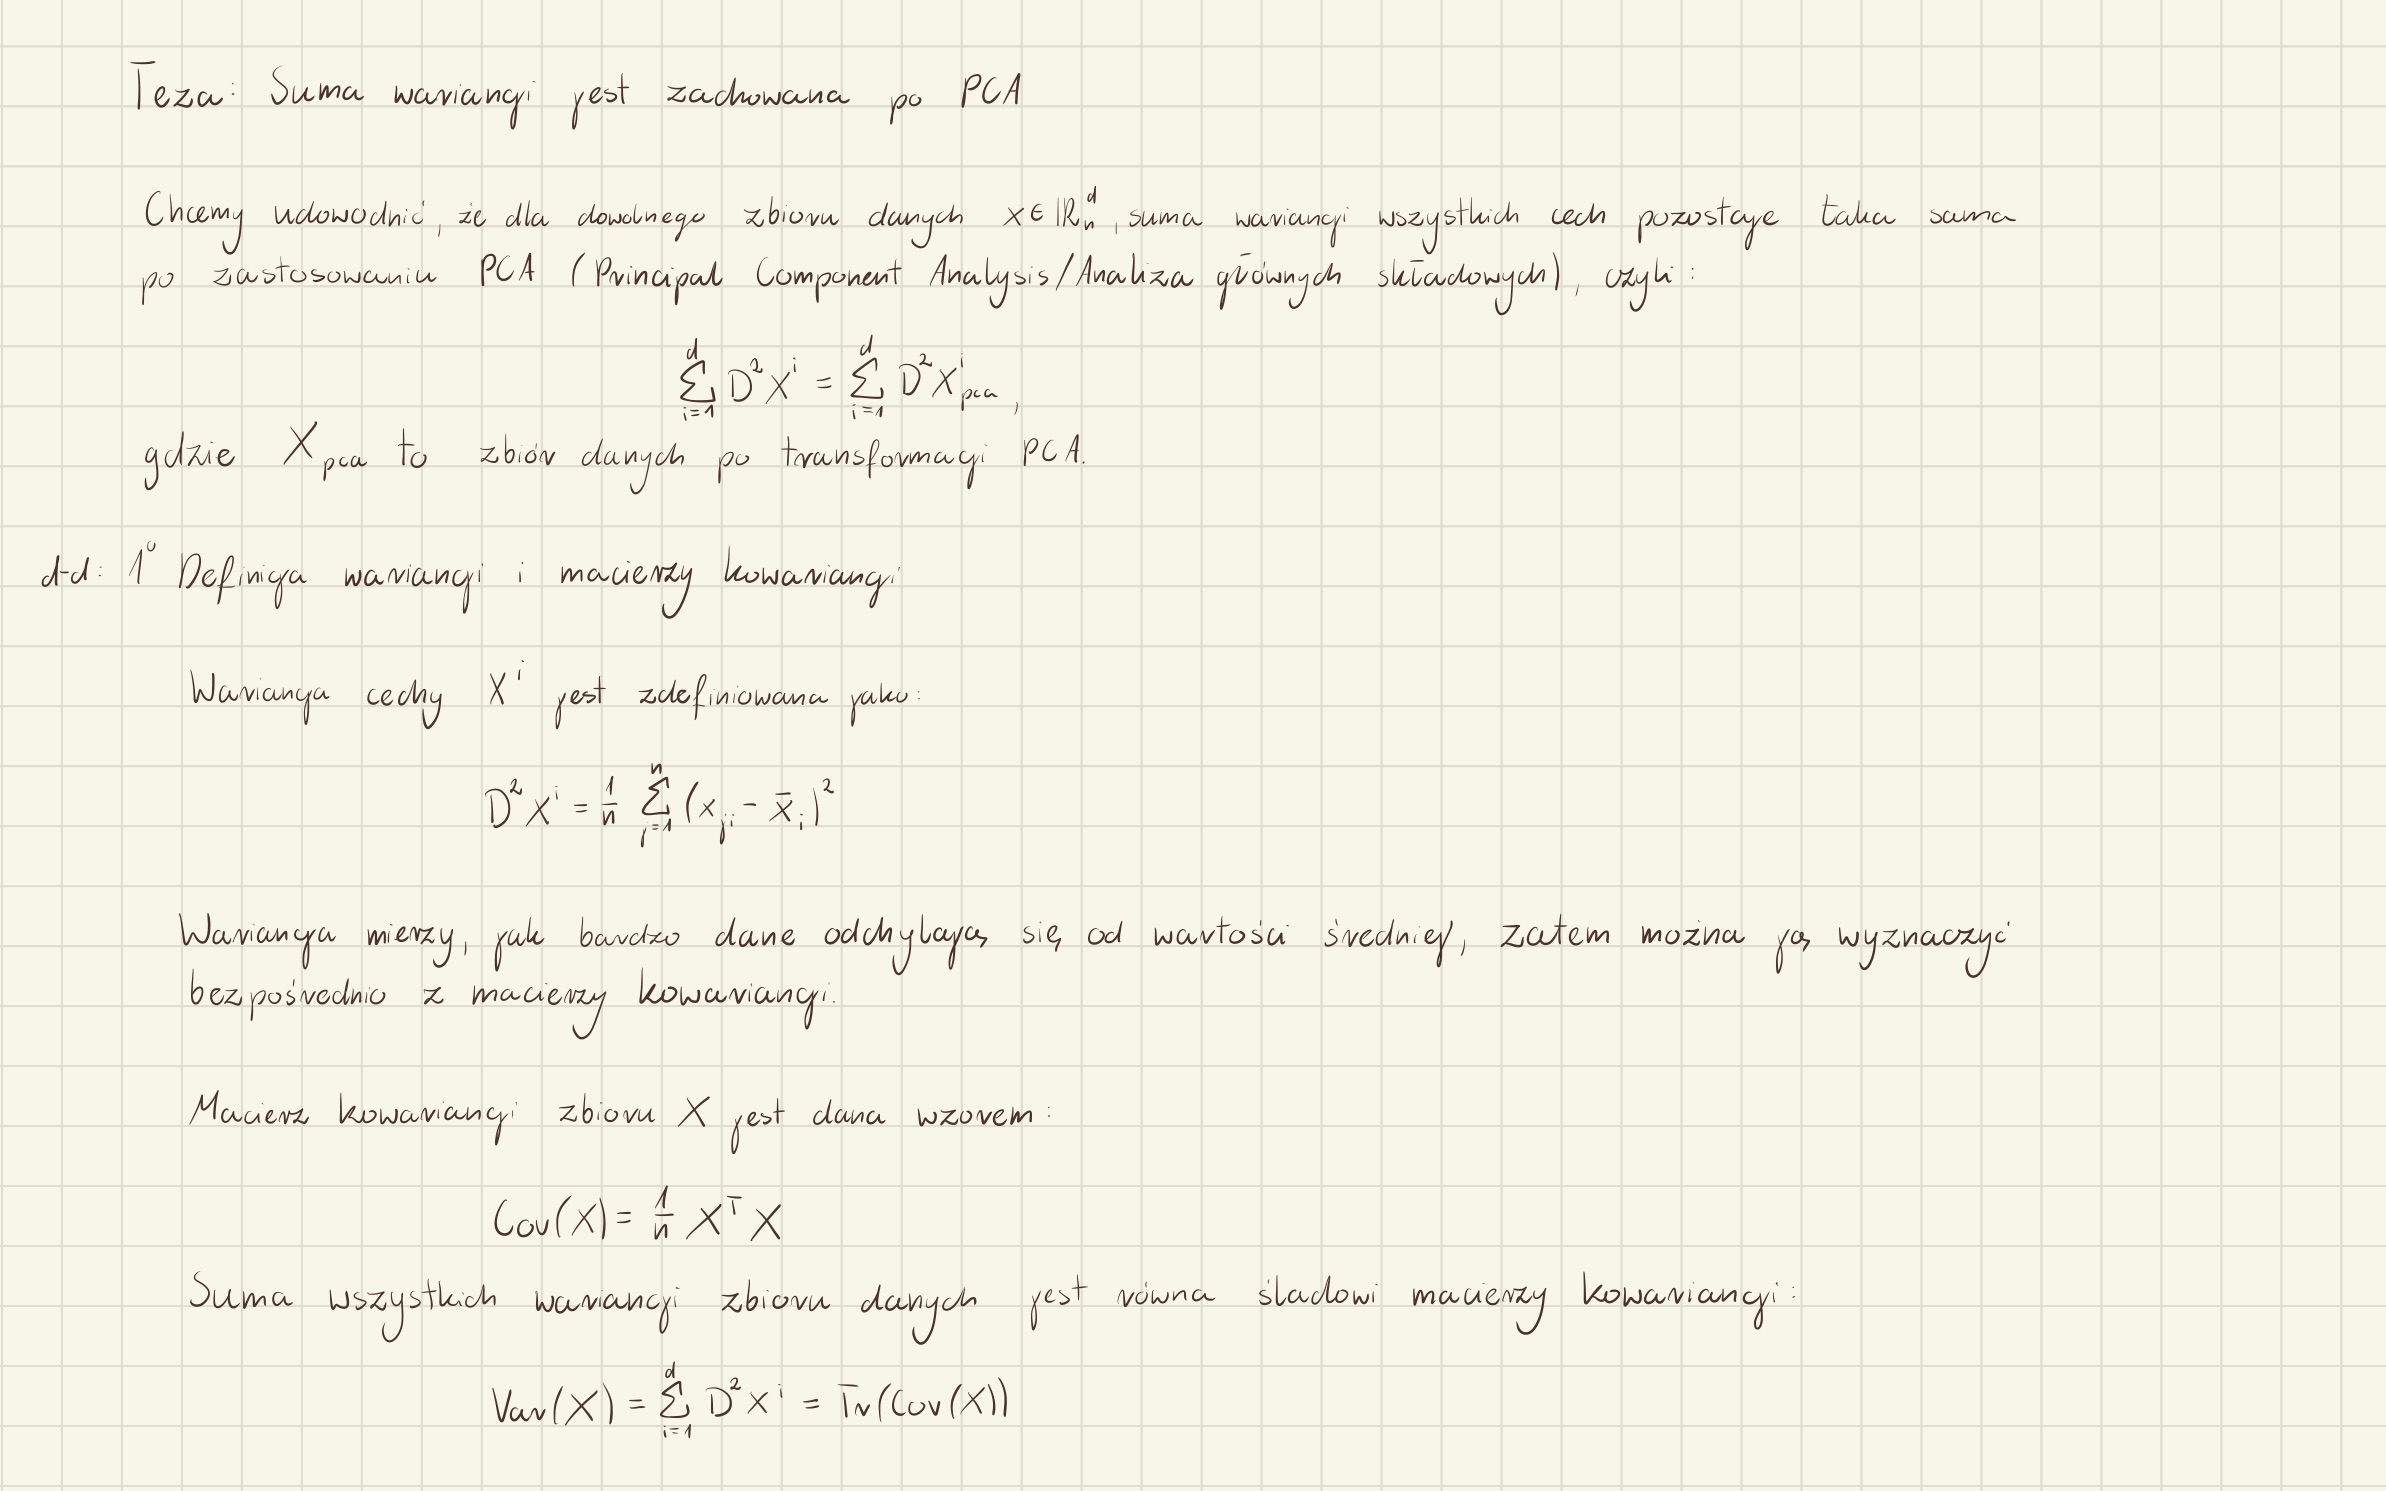

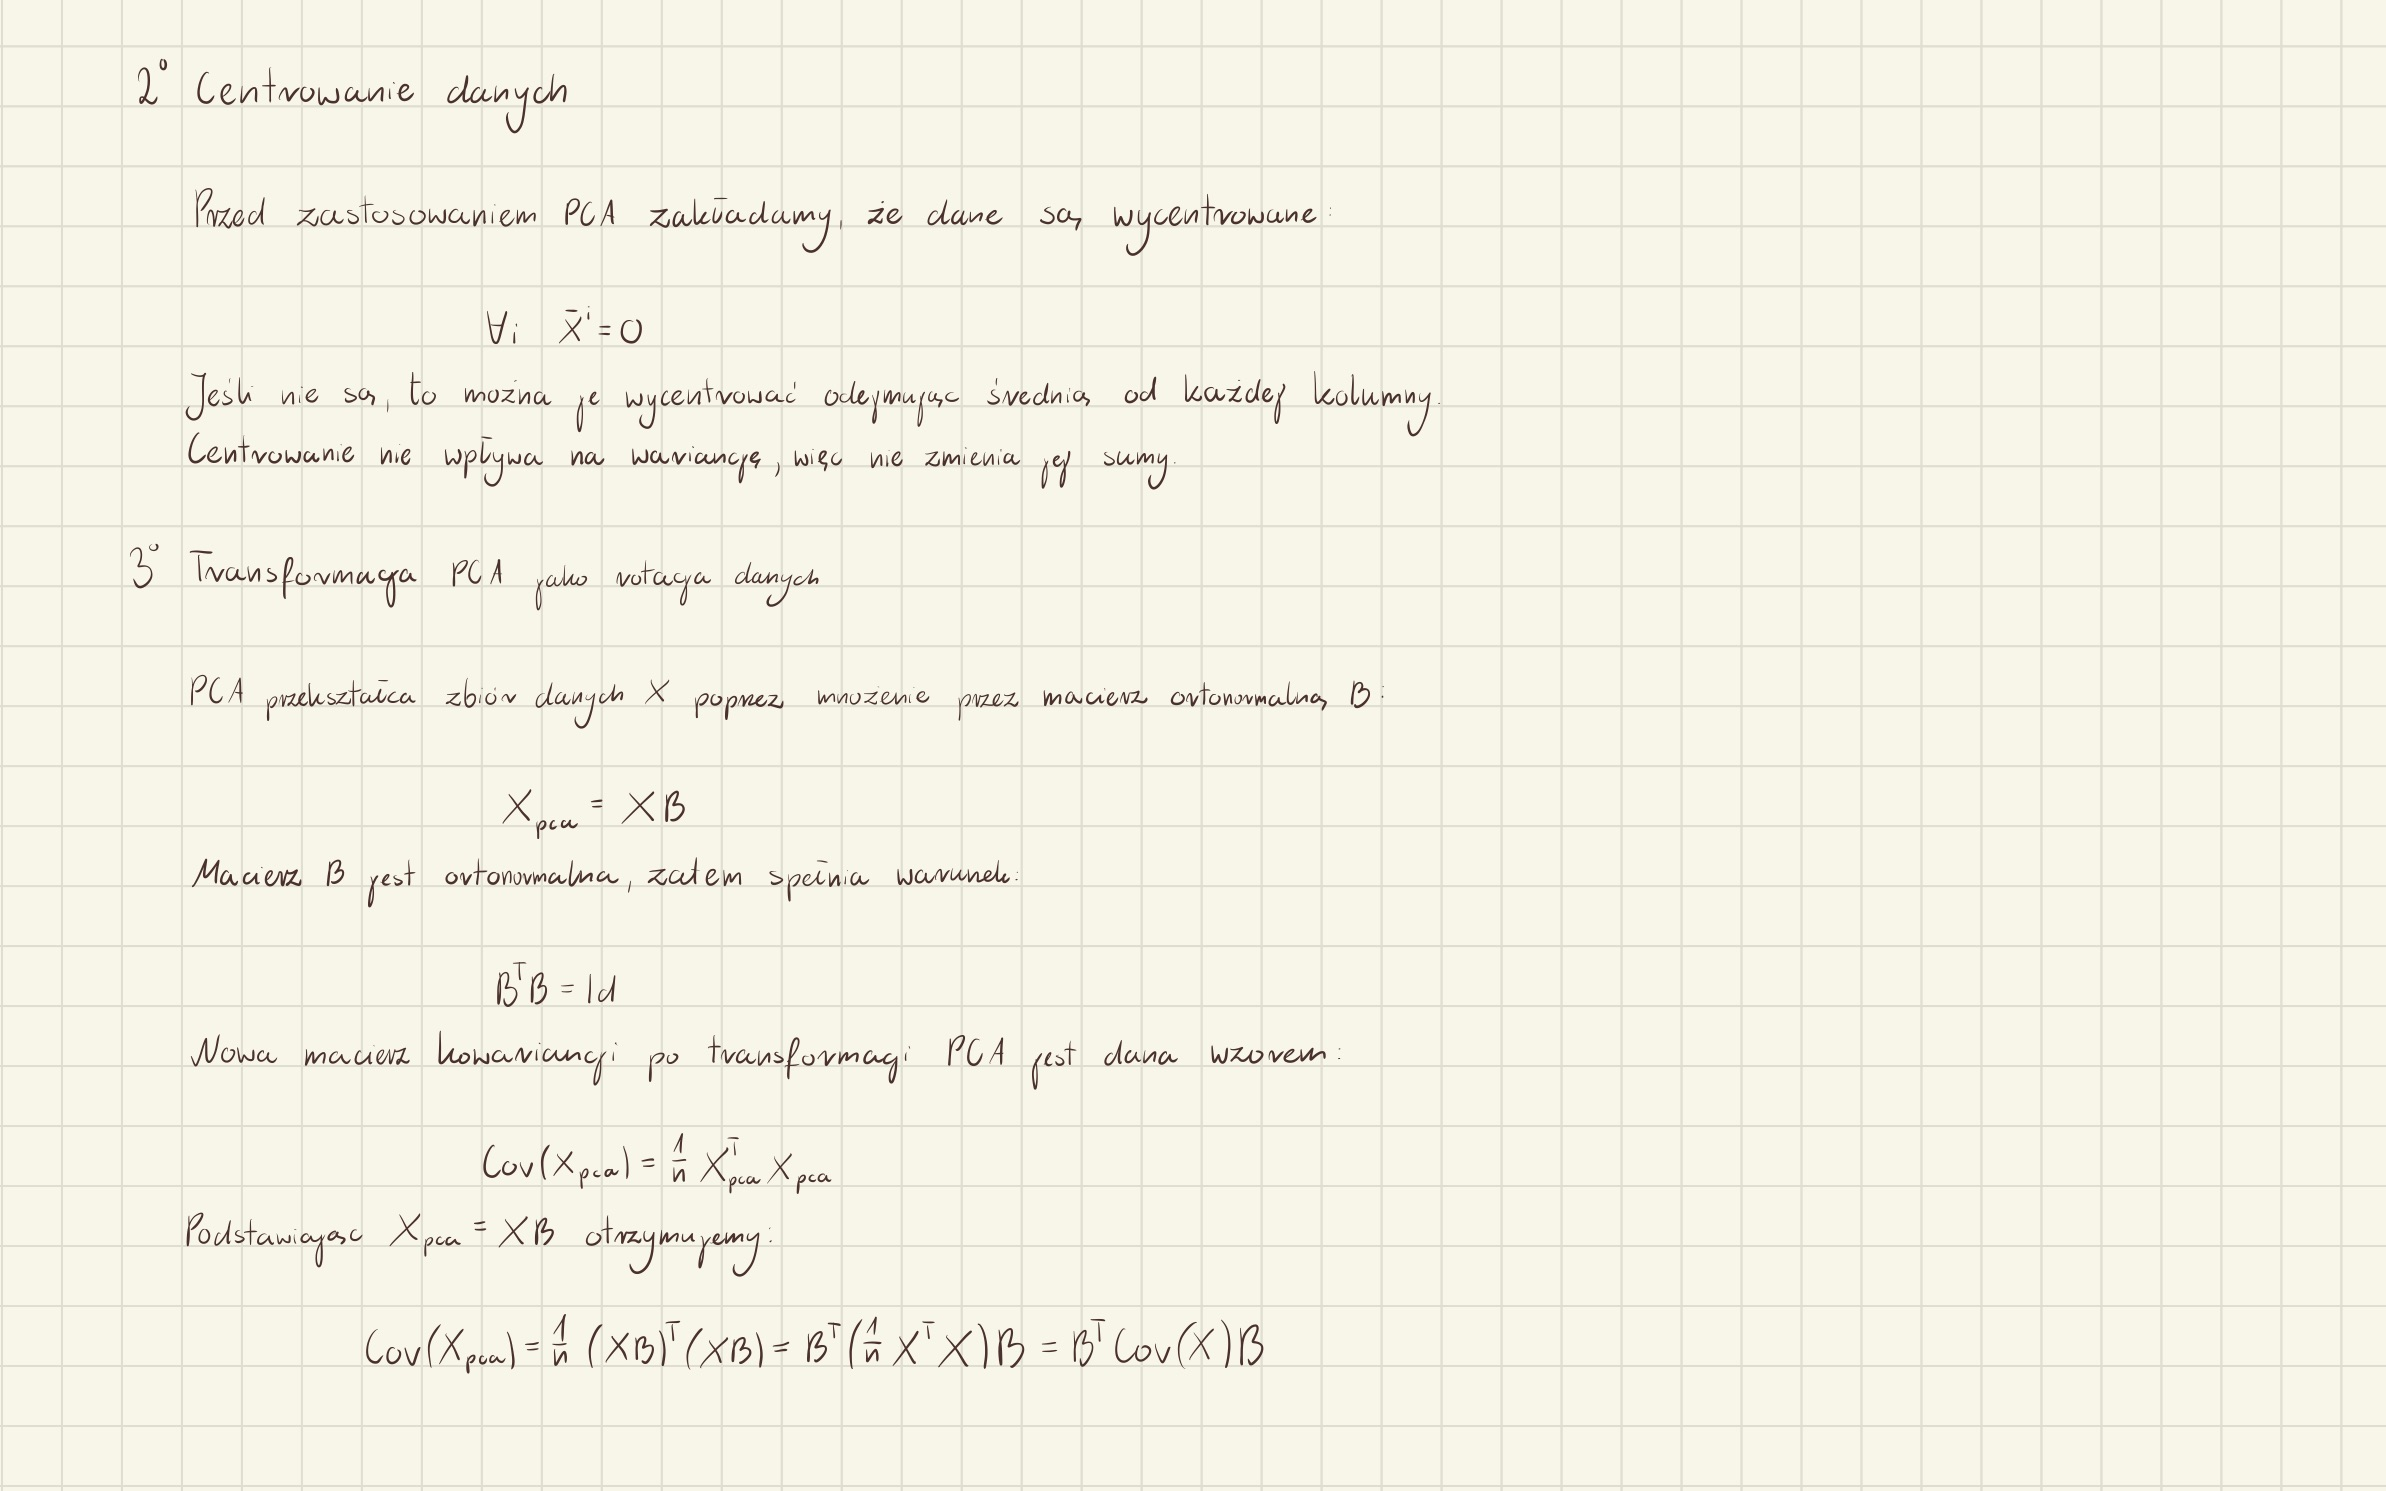

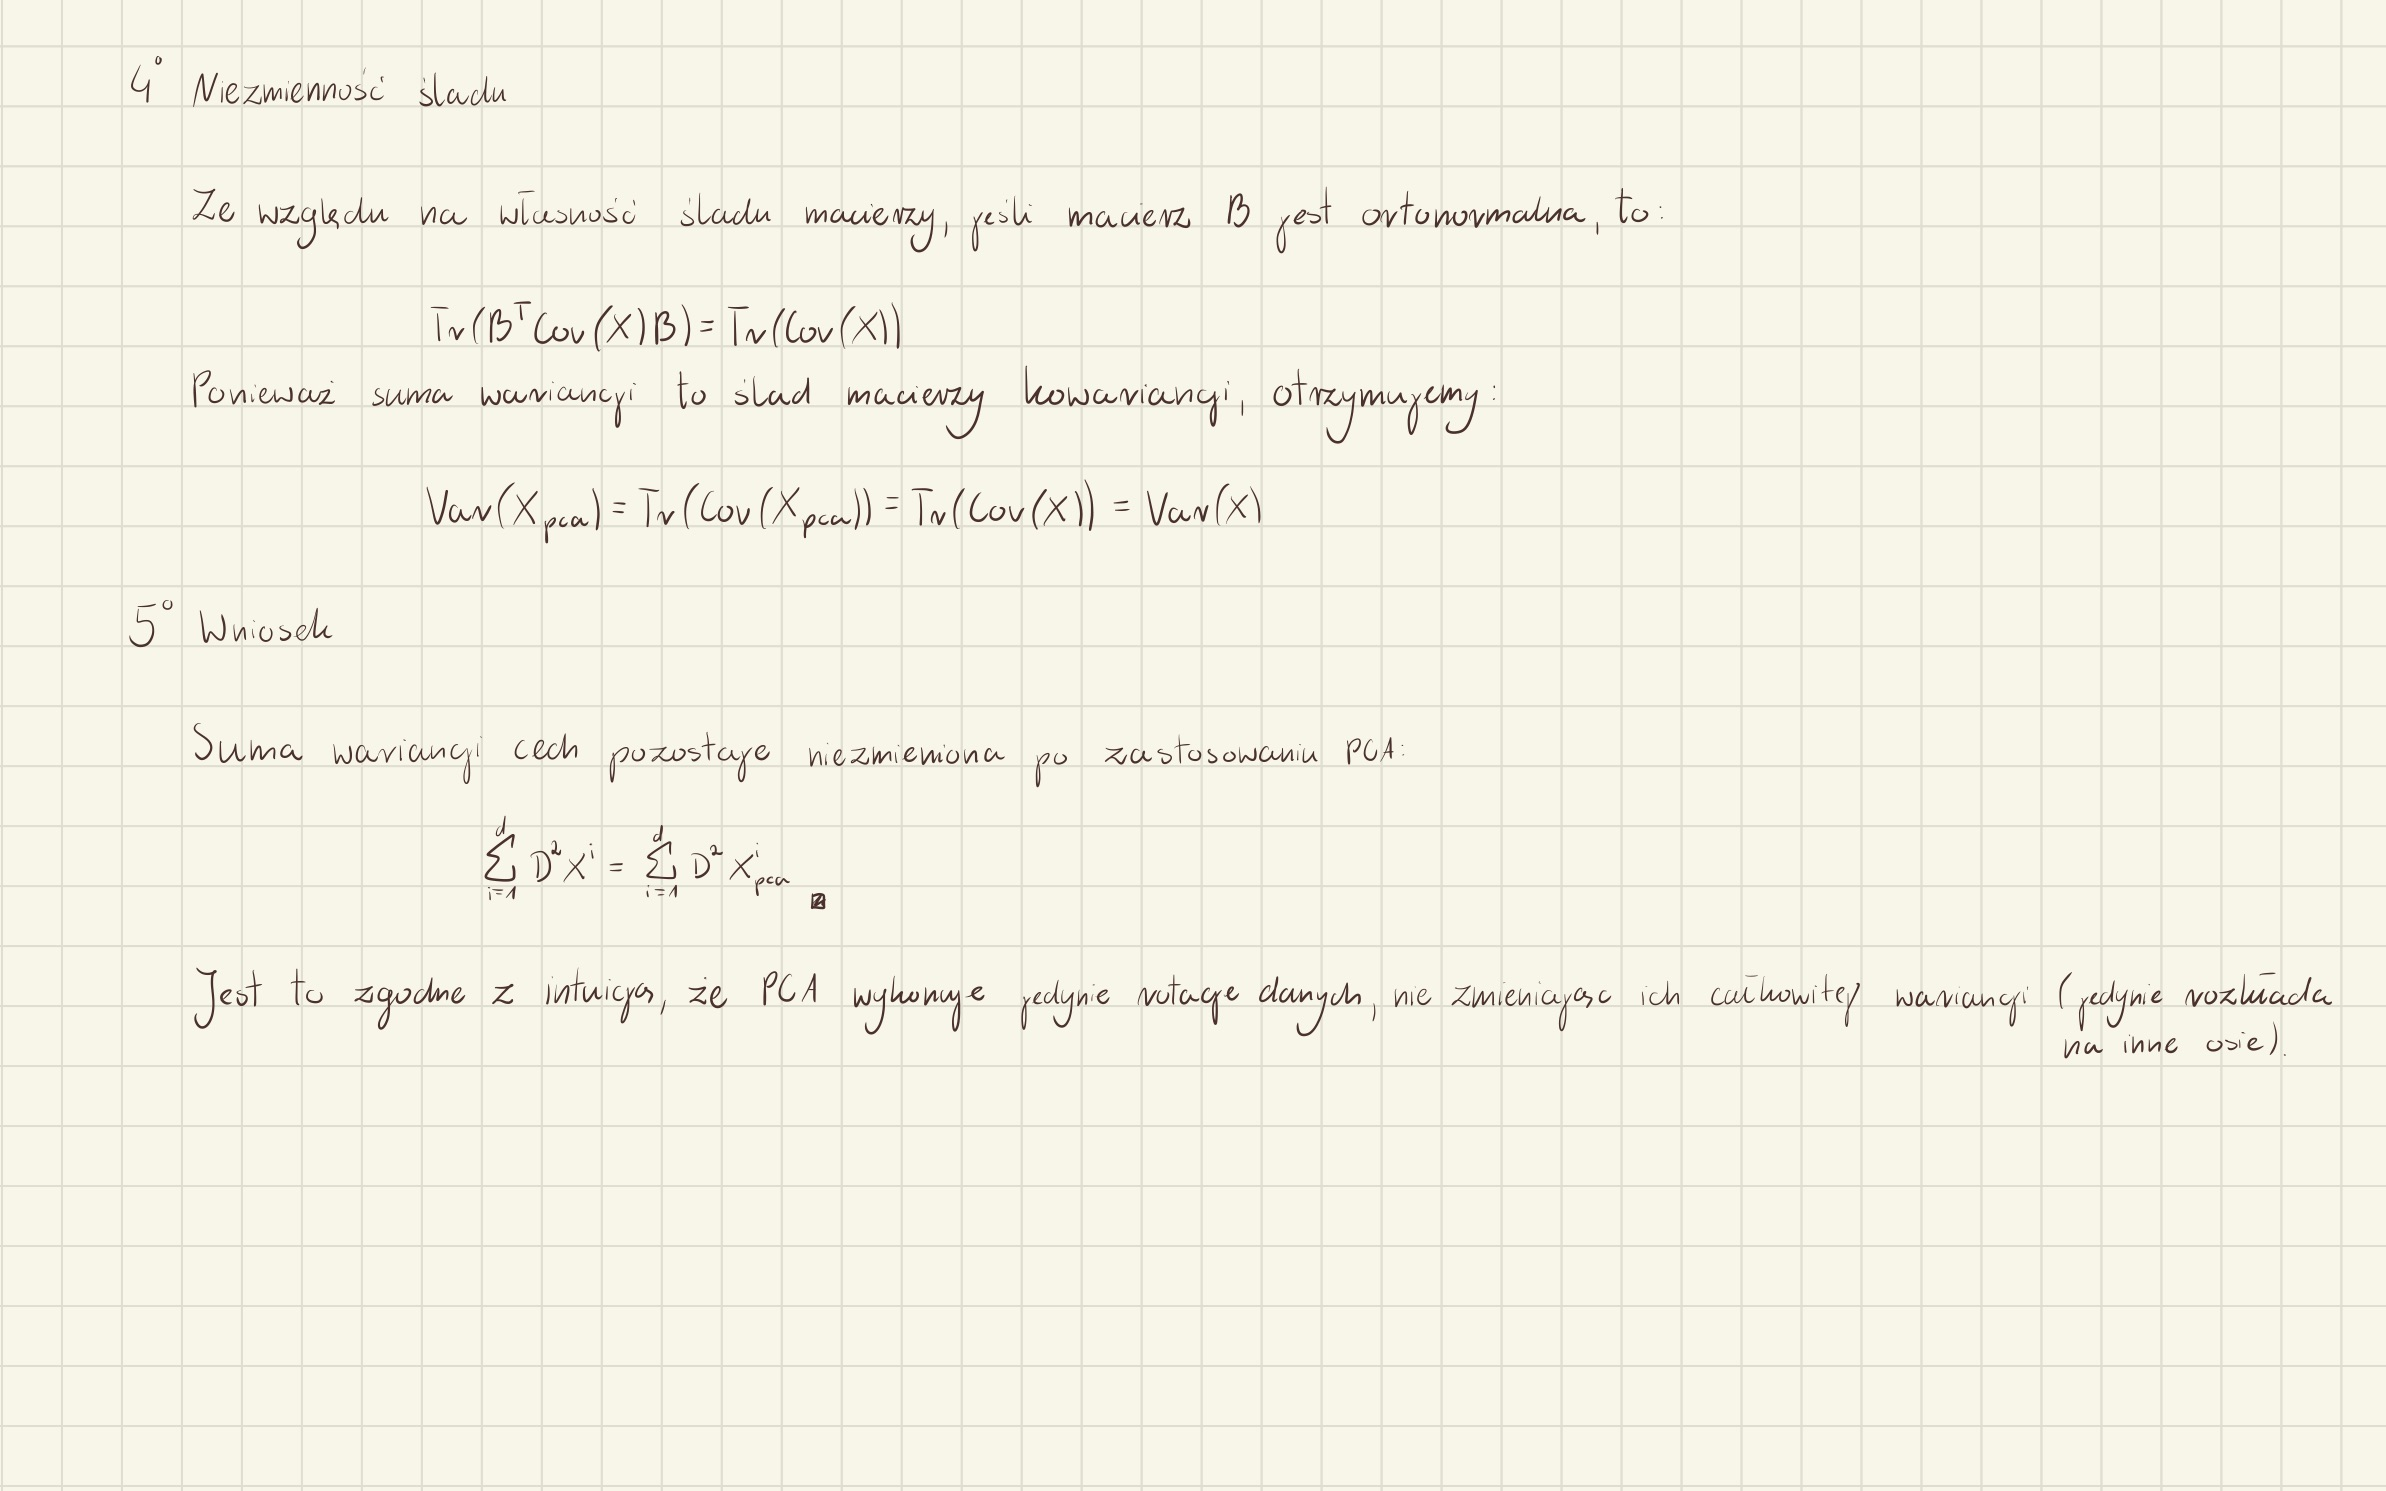

# **Problem 3 (1p)**

In this problem you will use algorithm from Online Learning and Boosting, called Multiplicative Weights Update https://www.cs.princeton.edu/~arora/pubs/MWsurvey.pdf to solve the following optimization problem.

## Problem Definition
- **Input**:
  - Universe $U = \{1, 2, \dots, n\}$
  - Sets $\mathcal{S} = \{S_1, \dots, S_m\},\ S_i \subseteq U$
- **Goal**: Find smallest $\mathcal{C} \subseteq \mathcal{S}$ covering $U$

## Algorithm

**Initialize weights**:
   $$
   w_u^{(1)} = 1 \quad \forall u \in U
   $$

**Repeat until all elements covered**:
1. **Choose set** $S_i$ with probability:
   $$
   \mathbb{P}[S_i] = \frac{\sum_{u \in S_i} w_u^{(t)}}{\sum_{j=1}^m \sum_{u \in S_j} w_u^{(t)}}
   $$

2. **Add** $S_i$ to solution $\mathcal{C}$

3. **Update weights** for uncovered $u \in S_i$:
   $$
   w_u^{(t+1)} = \frac{1}{2}w_u^{(t)}
   $$

## Task
1. Show that the total number of rounds (the number of sets the algorithm returns) is on expectation at most O(\log n) worse than the optimum number of sets needed:
   $$
   \mathbb{E}[T] \leq 2\text{OPT}\ln n
   $$



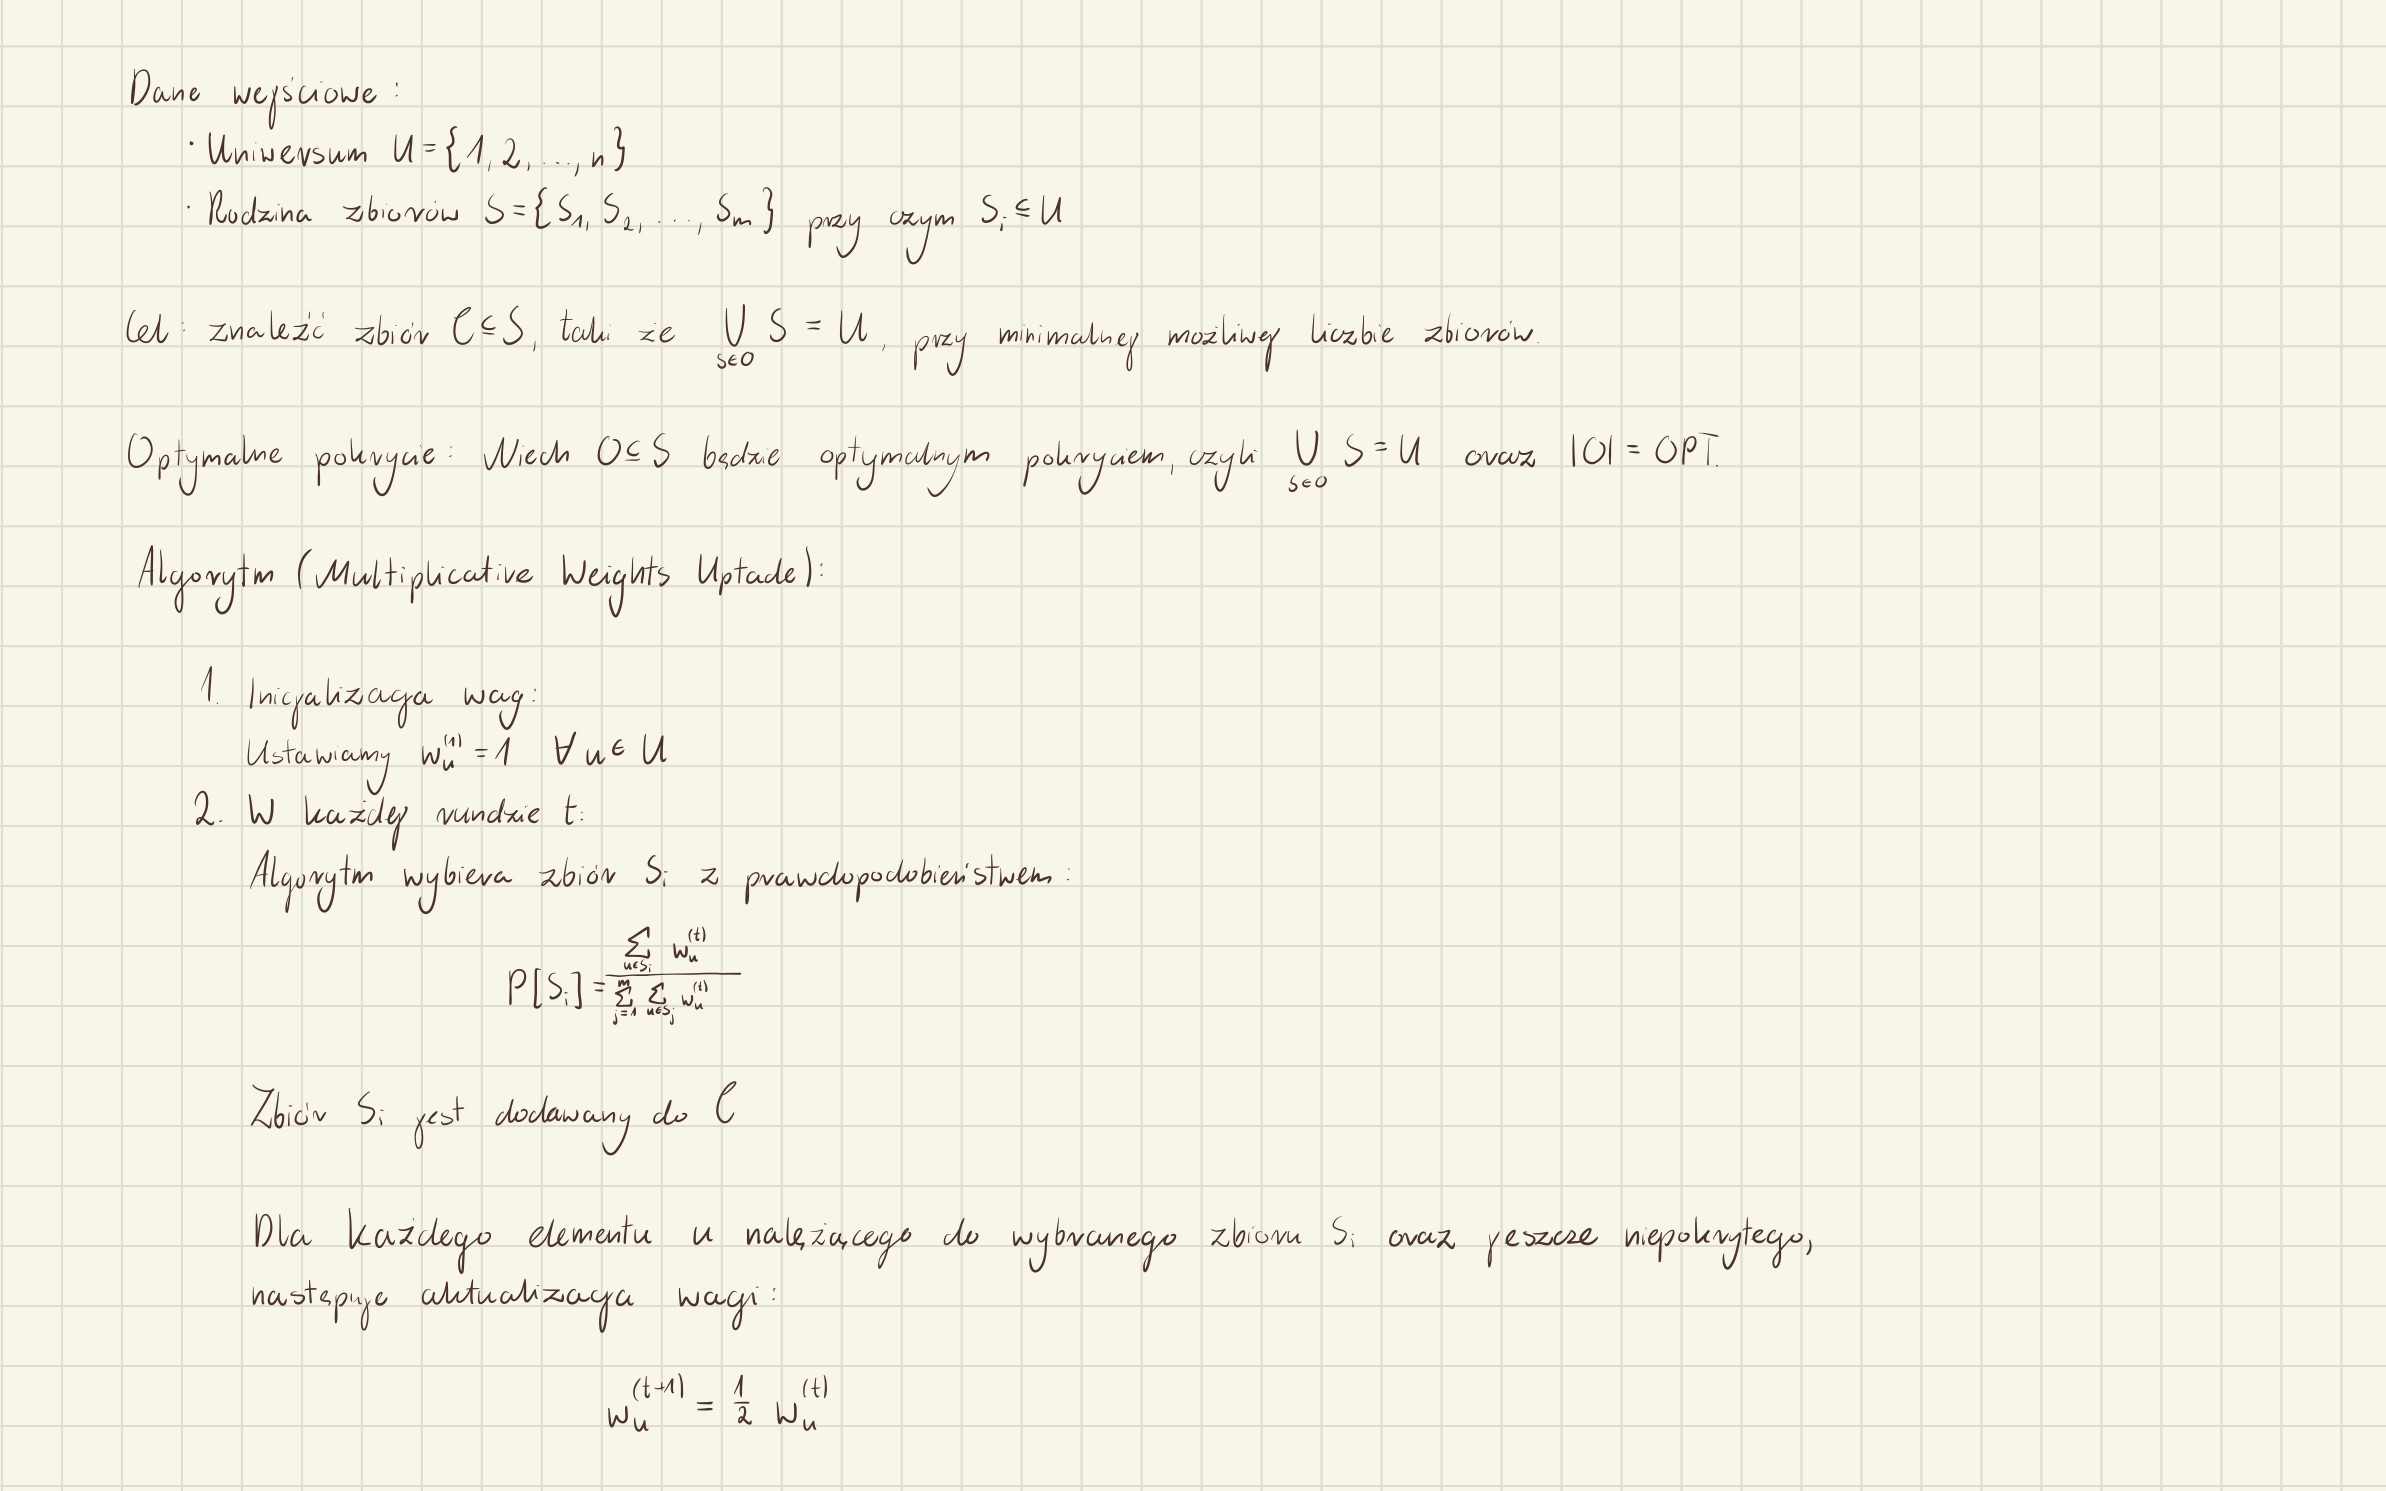

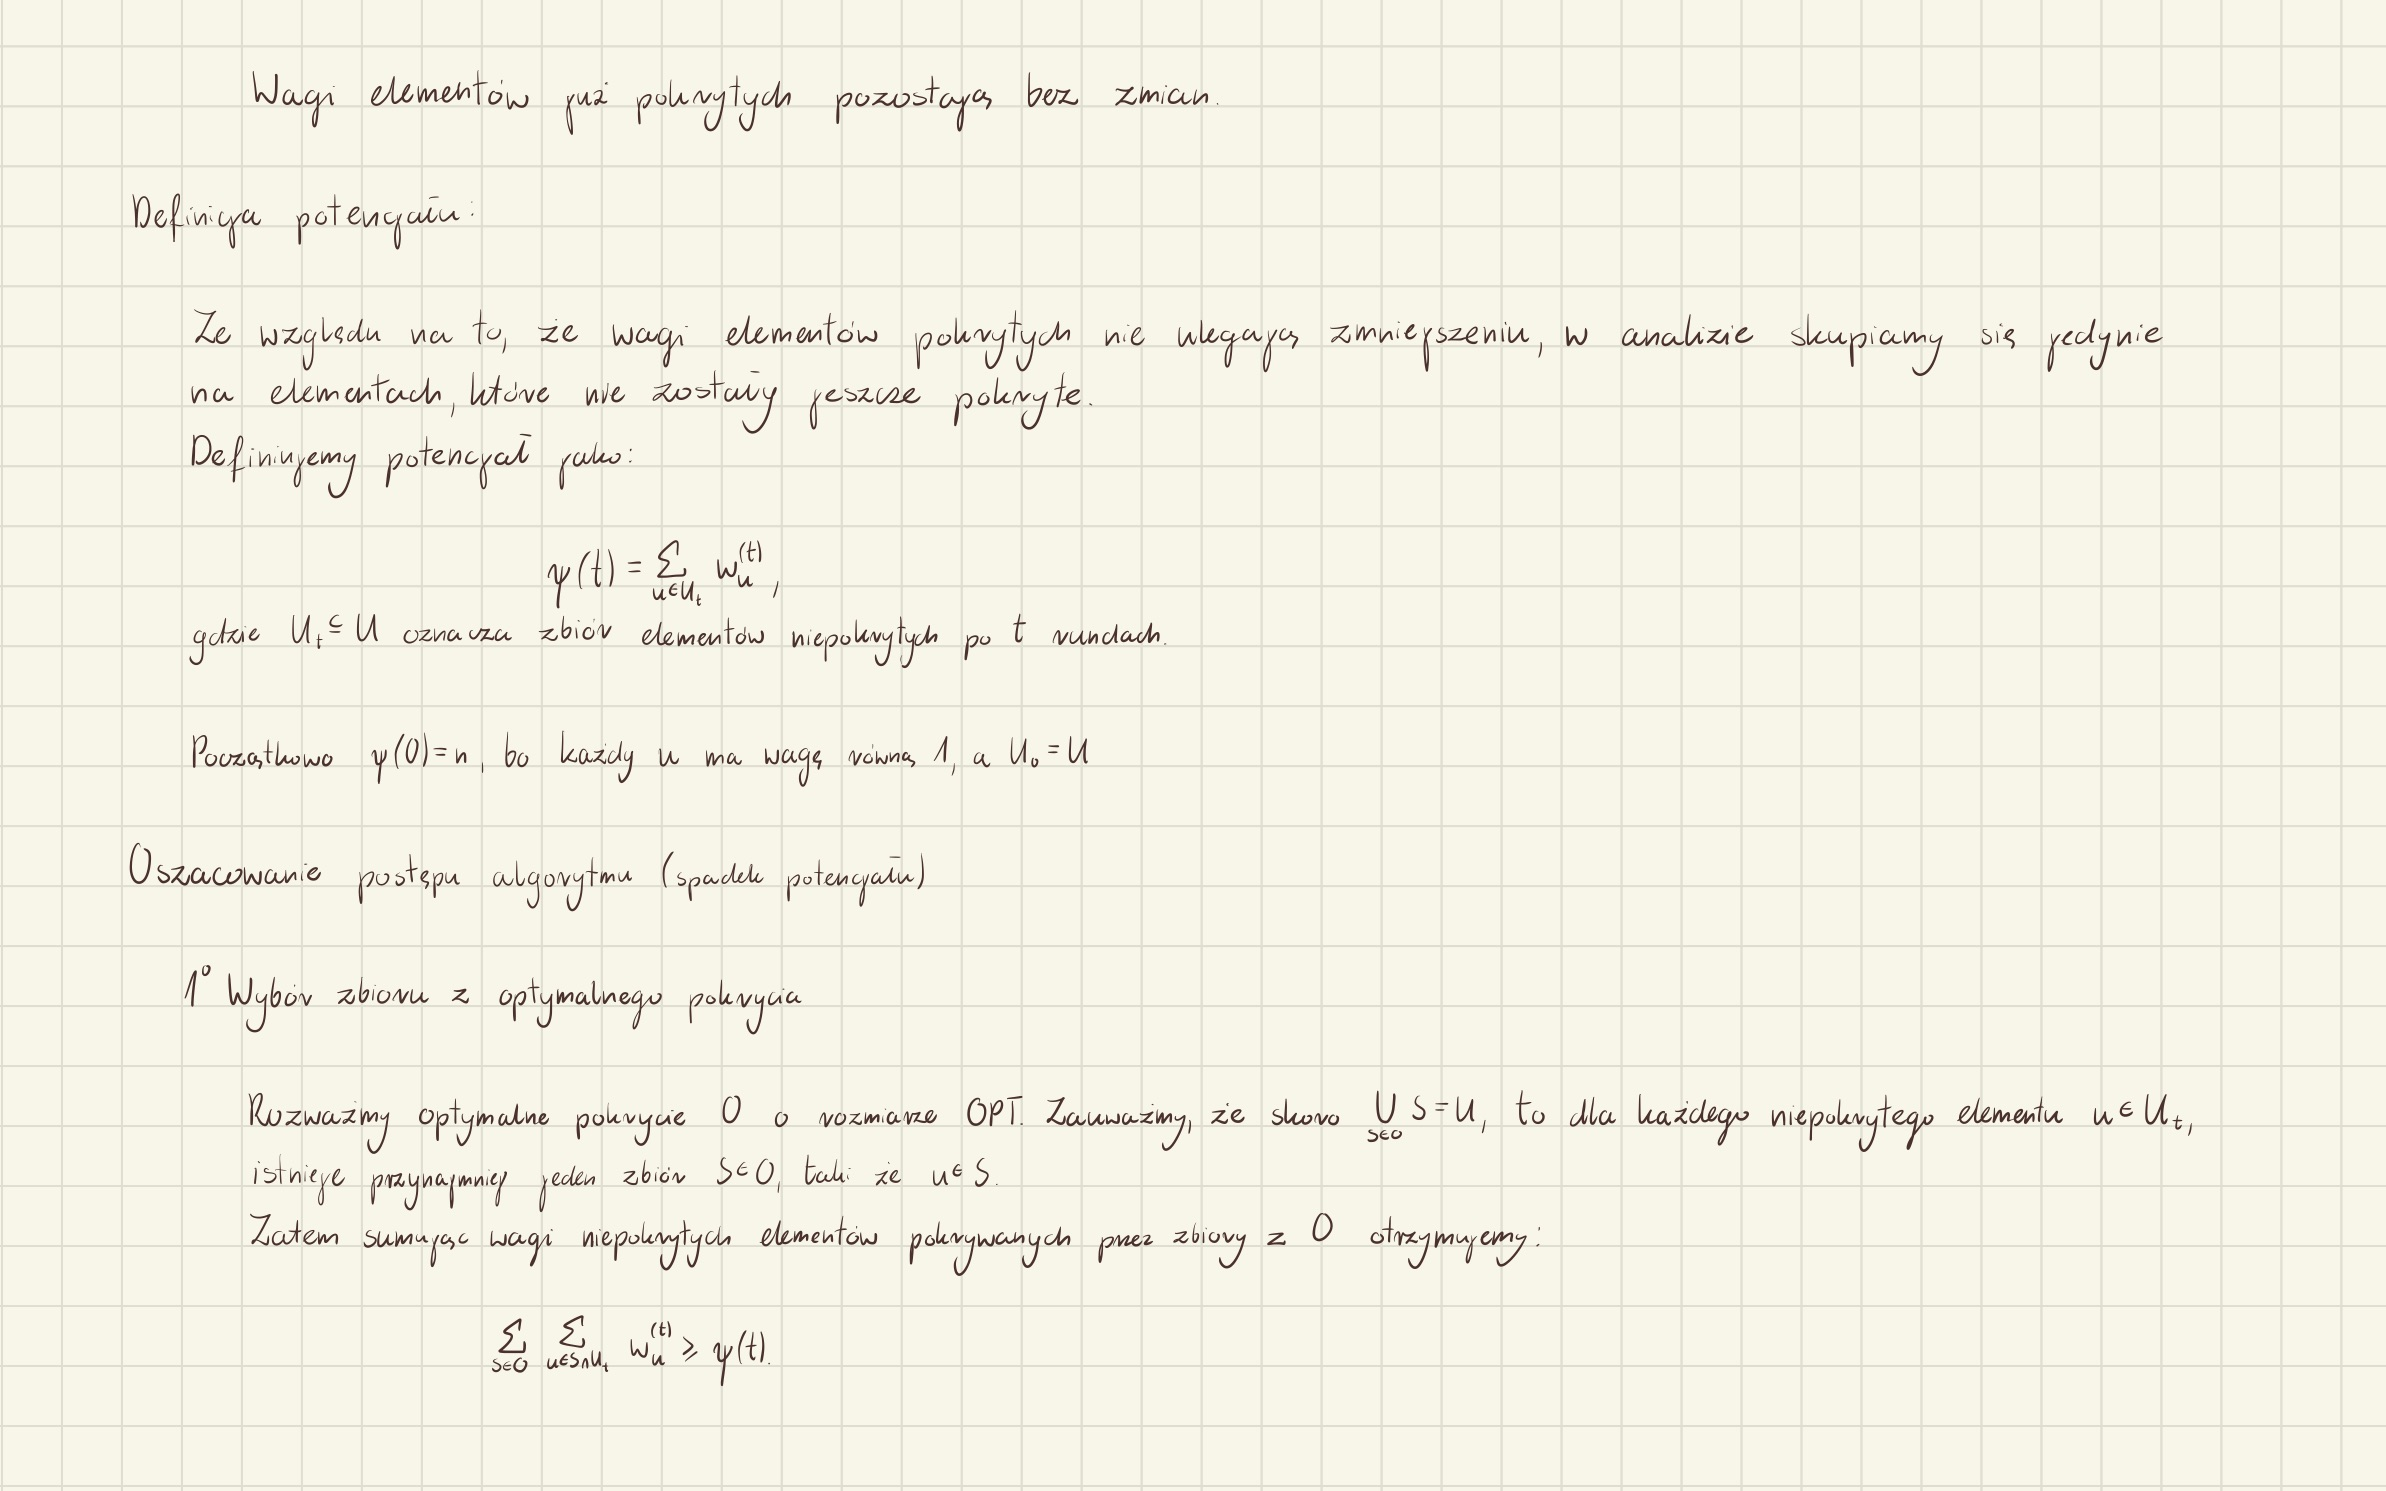

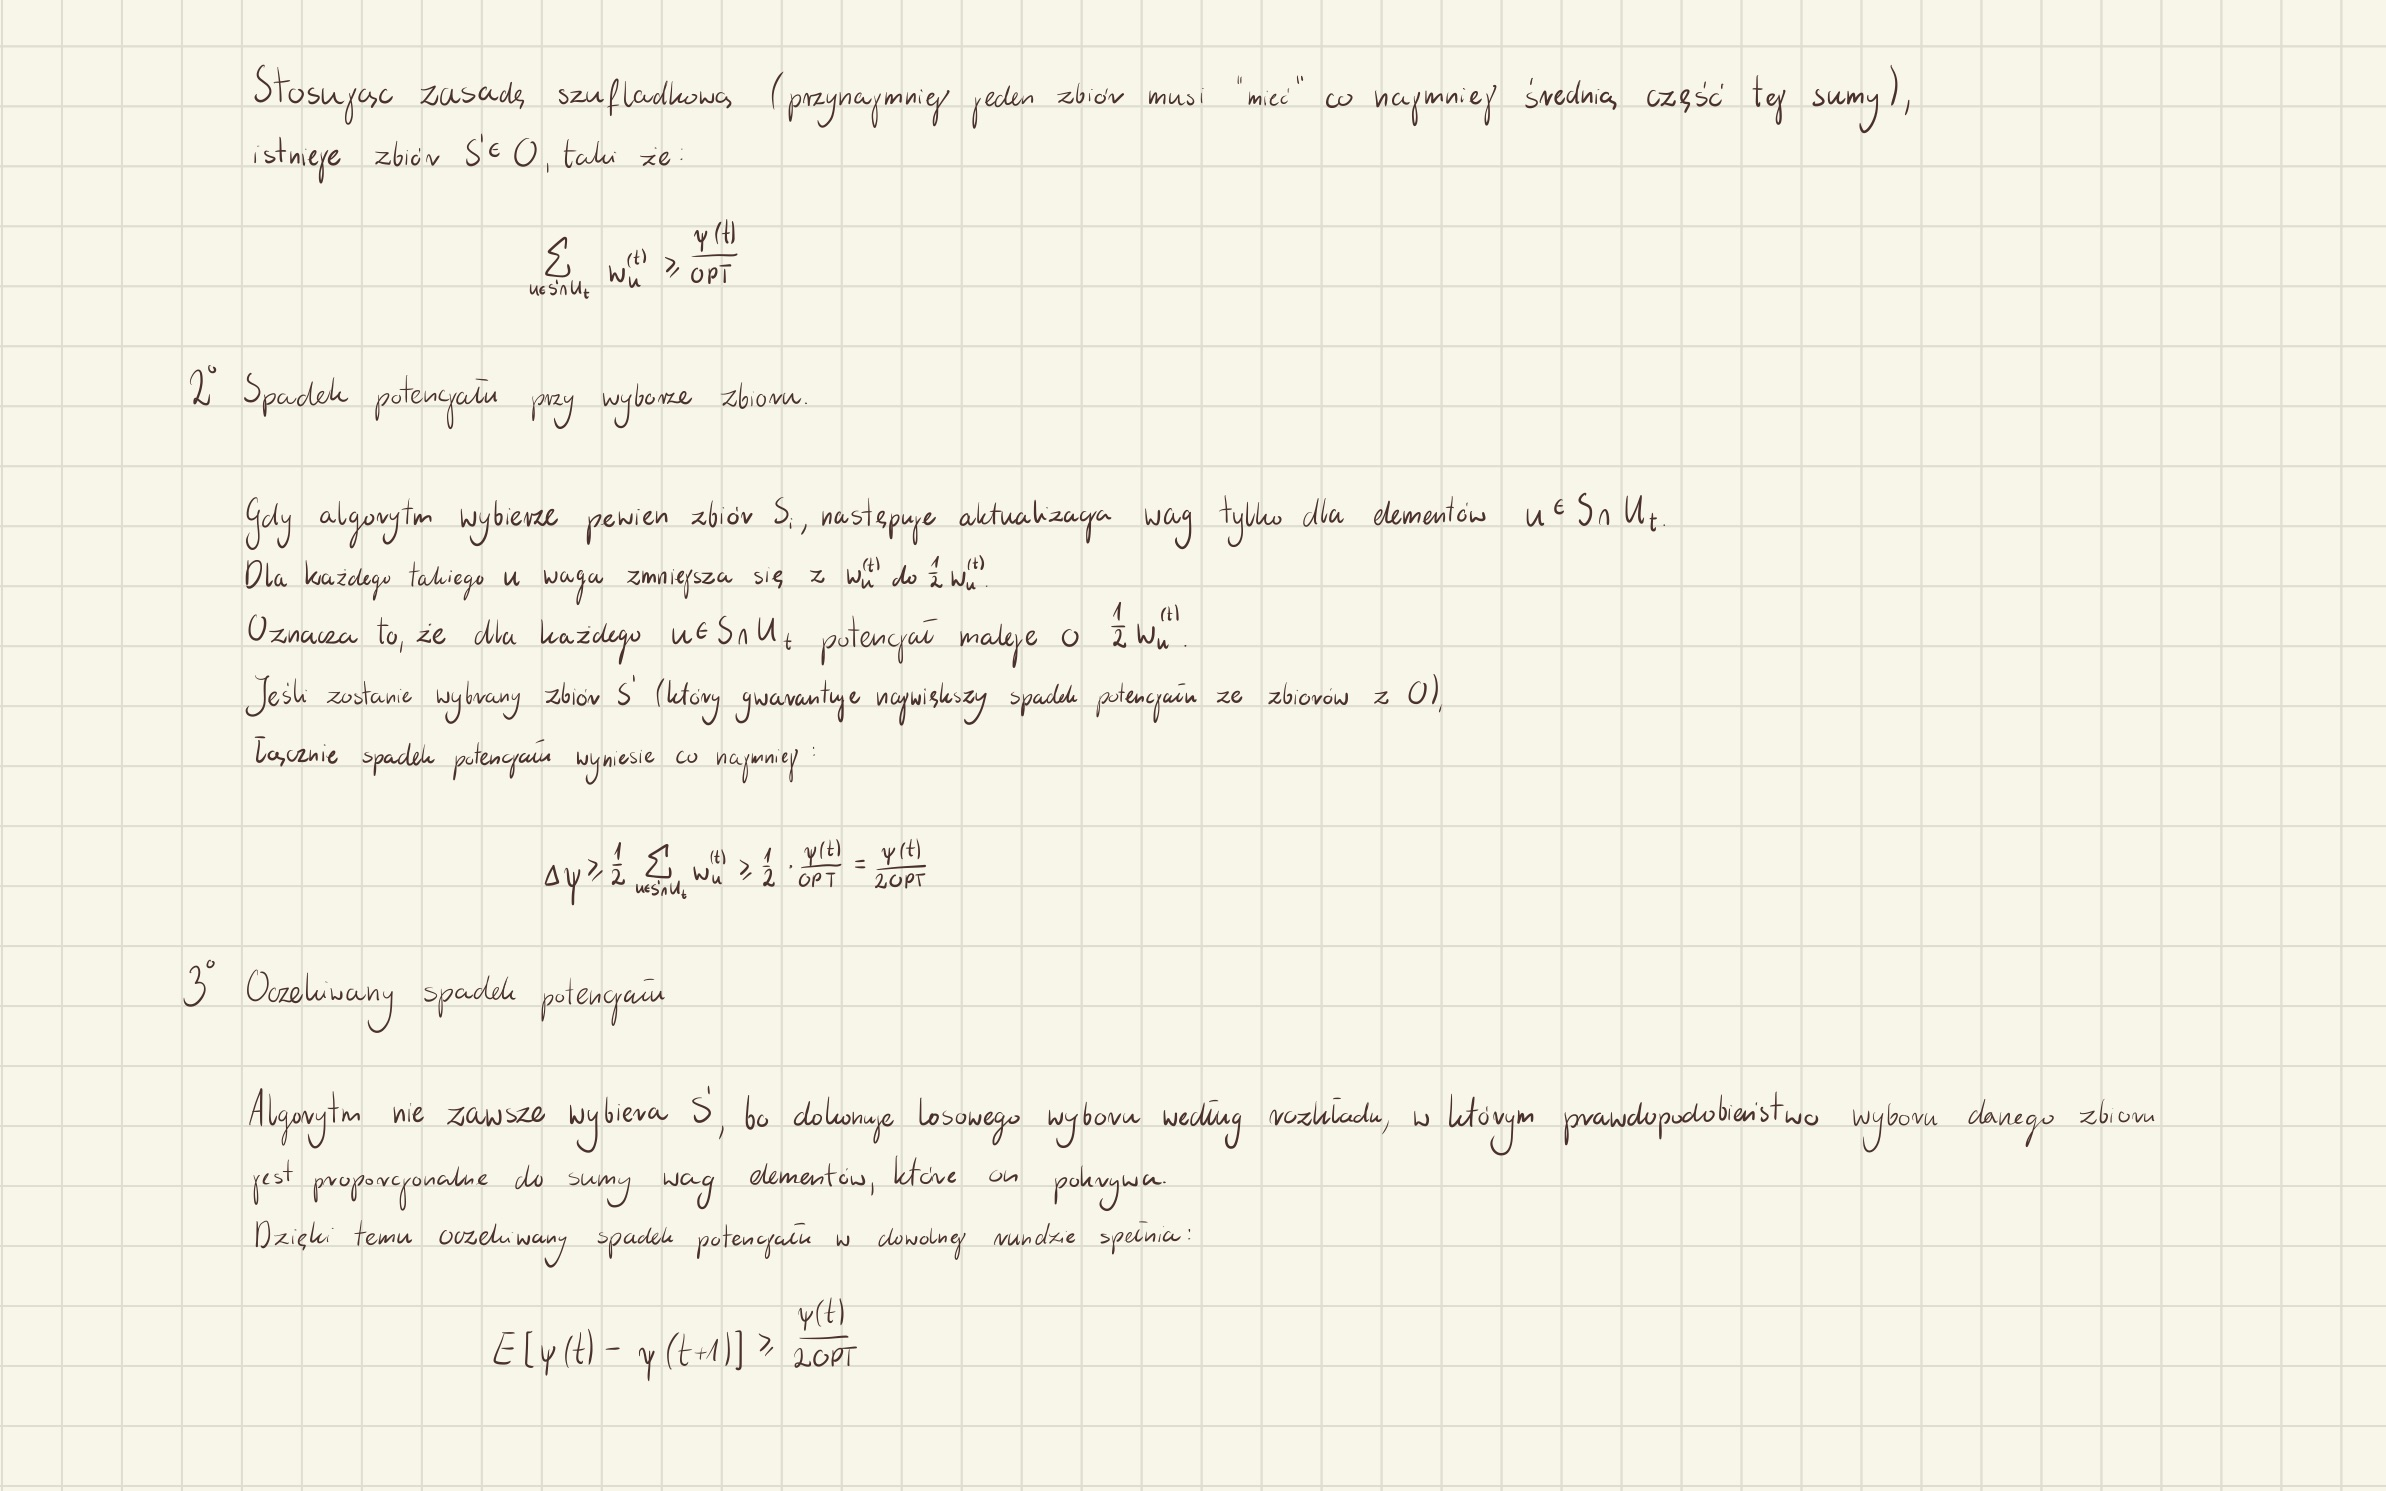

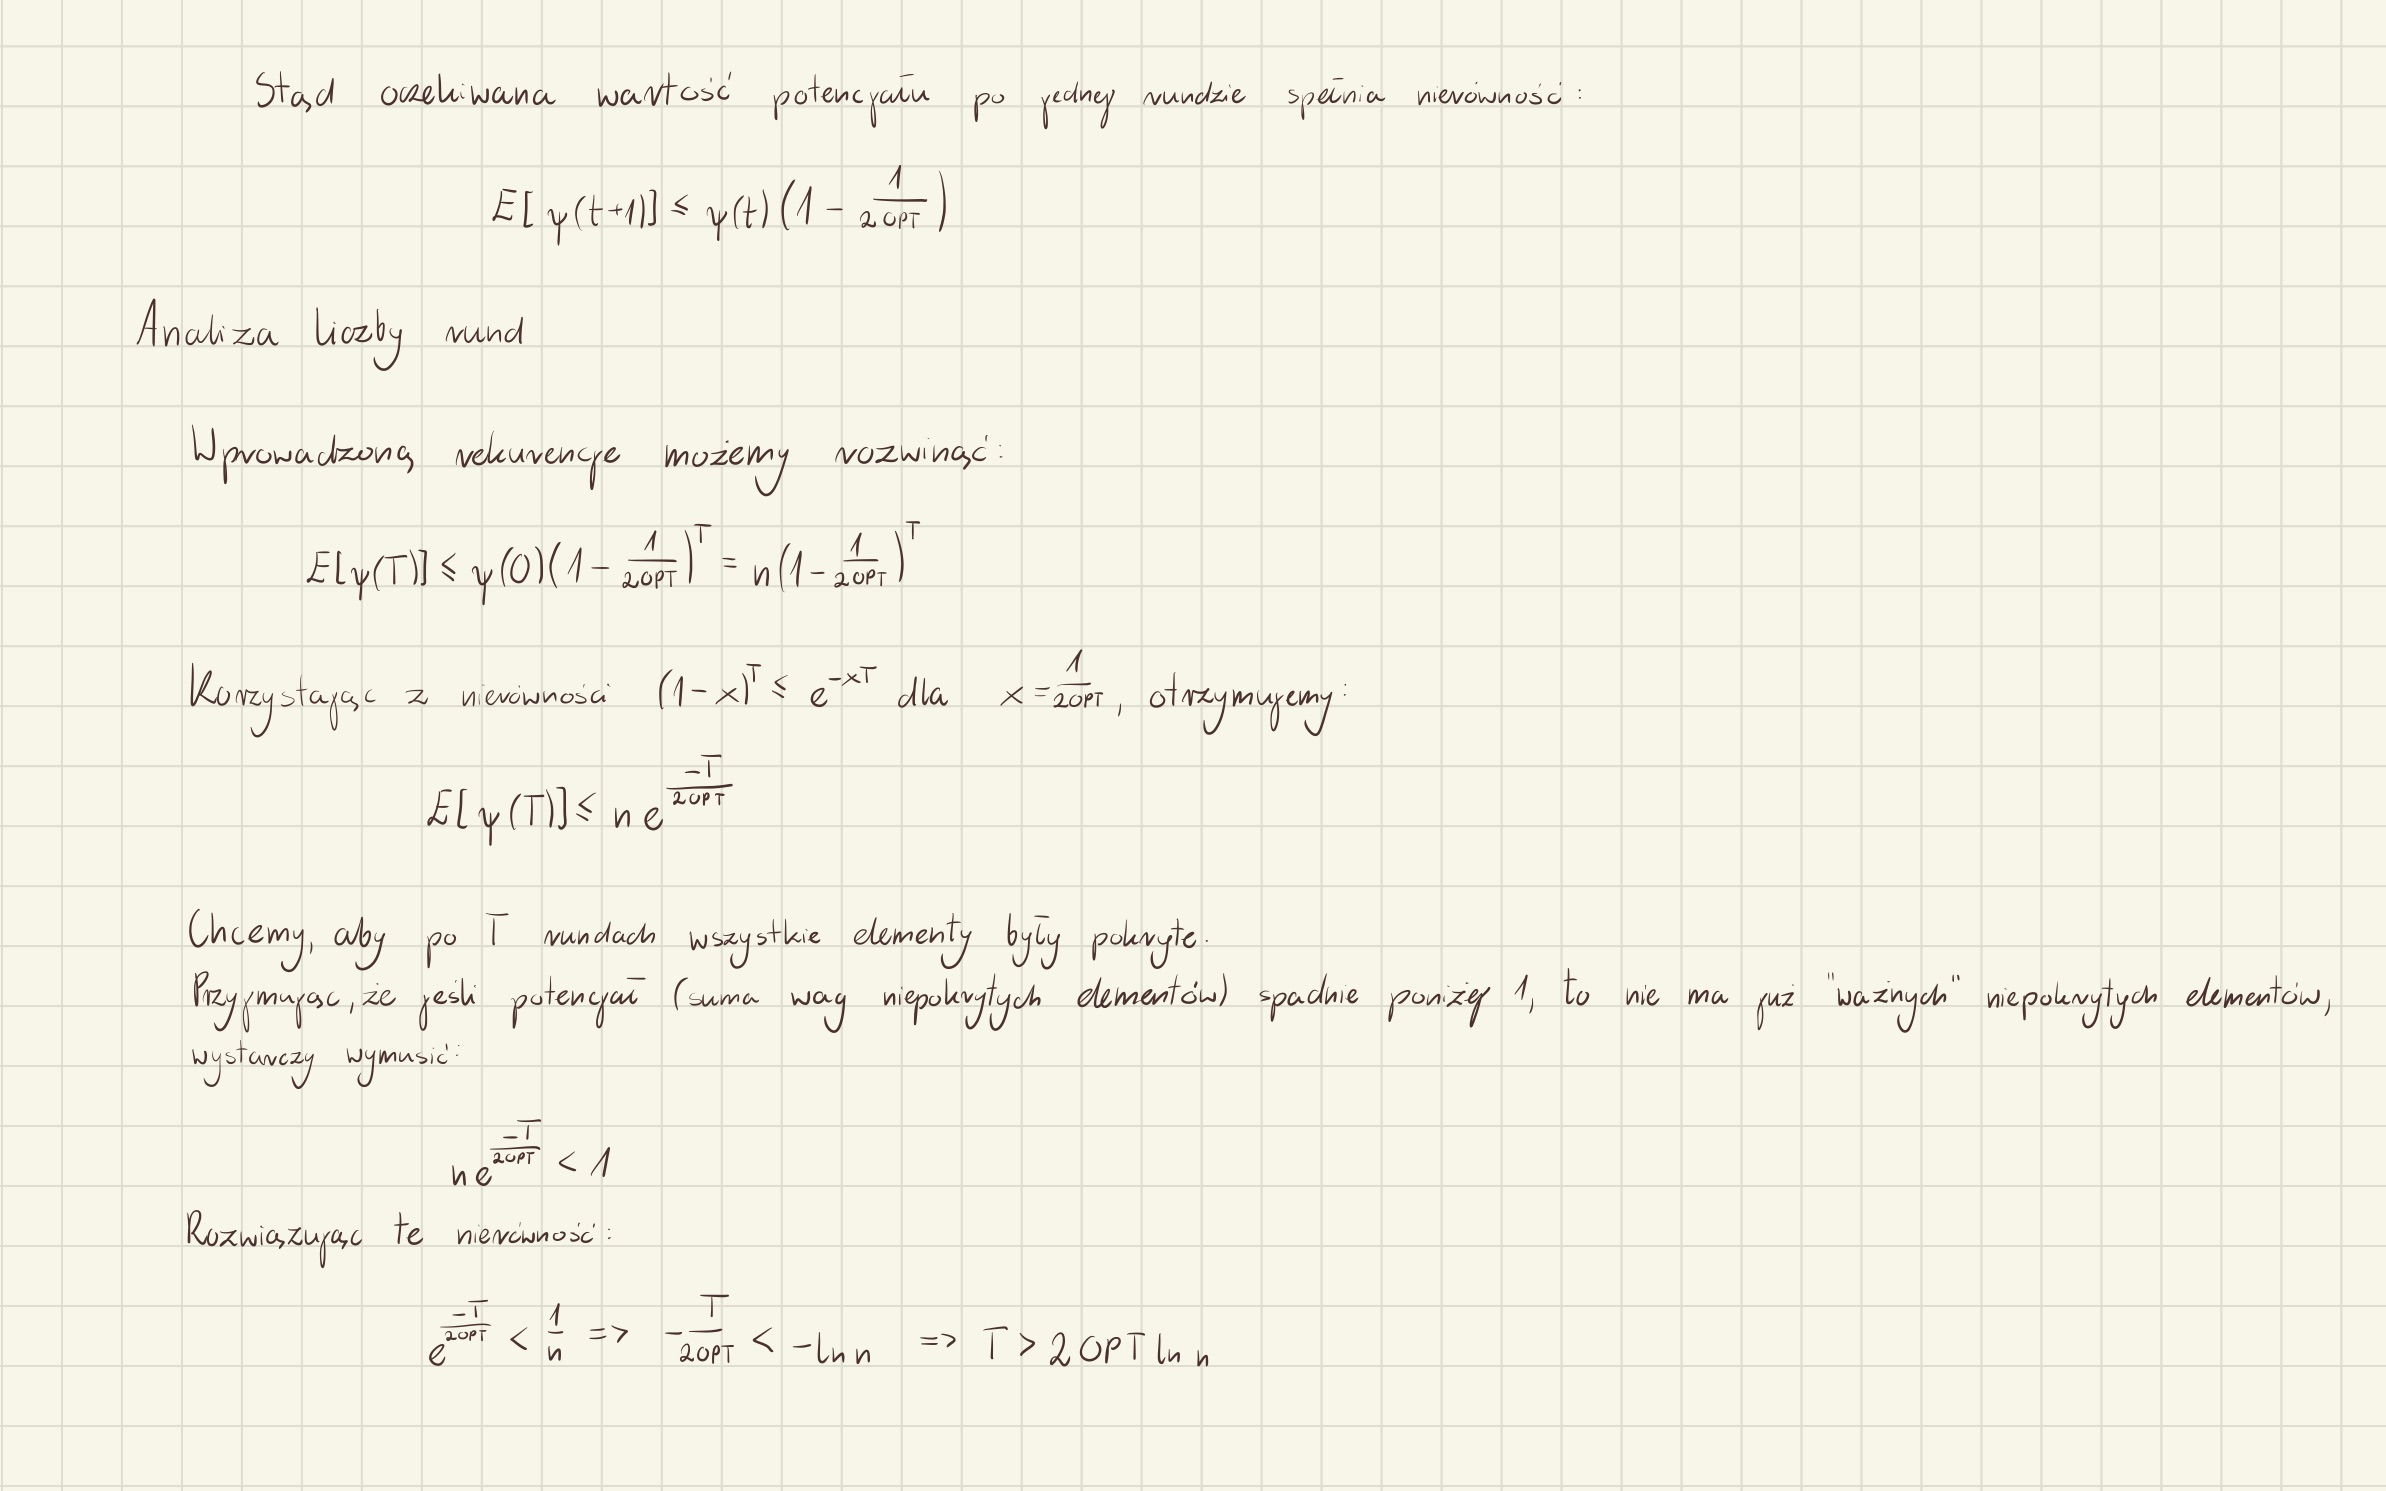

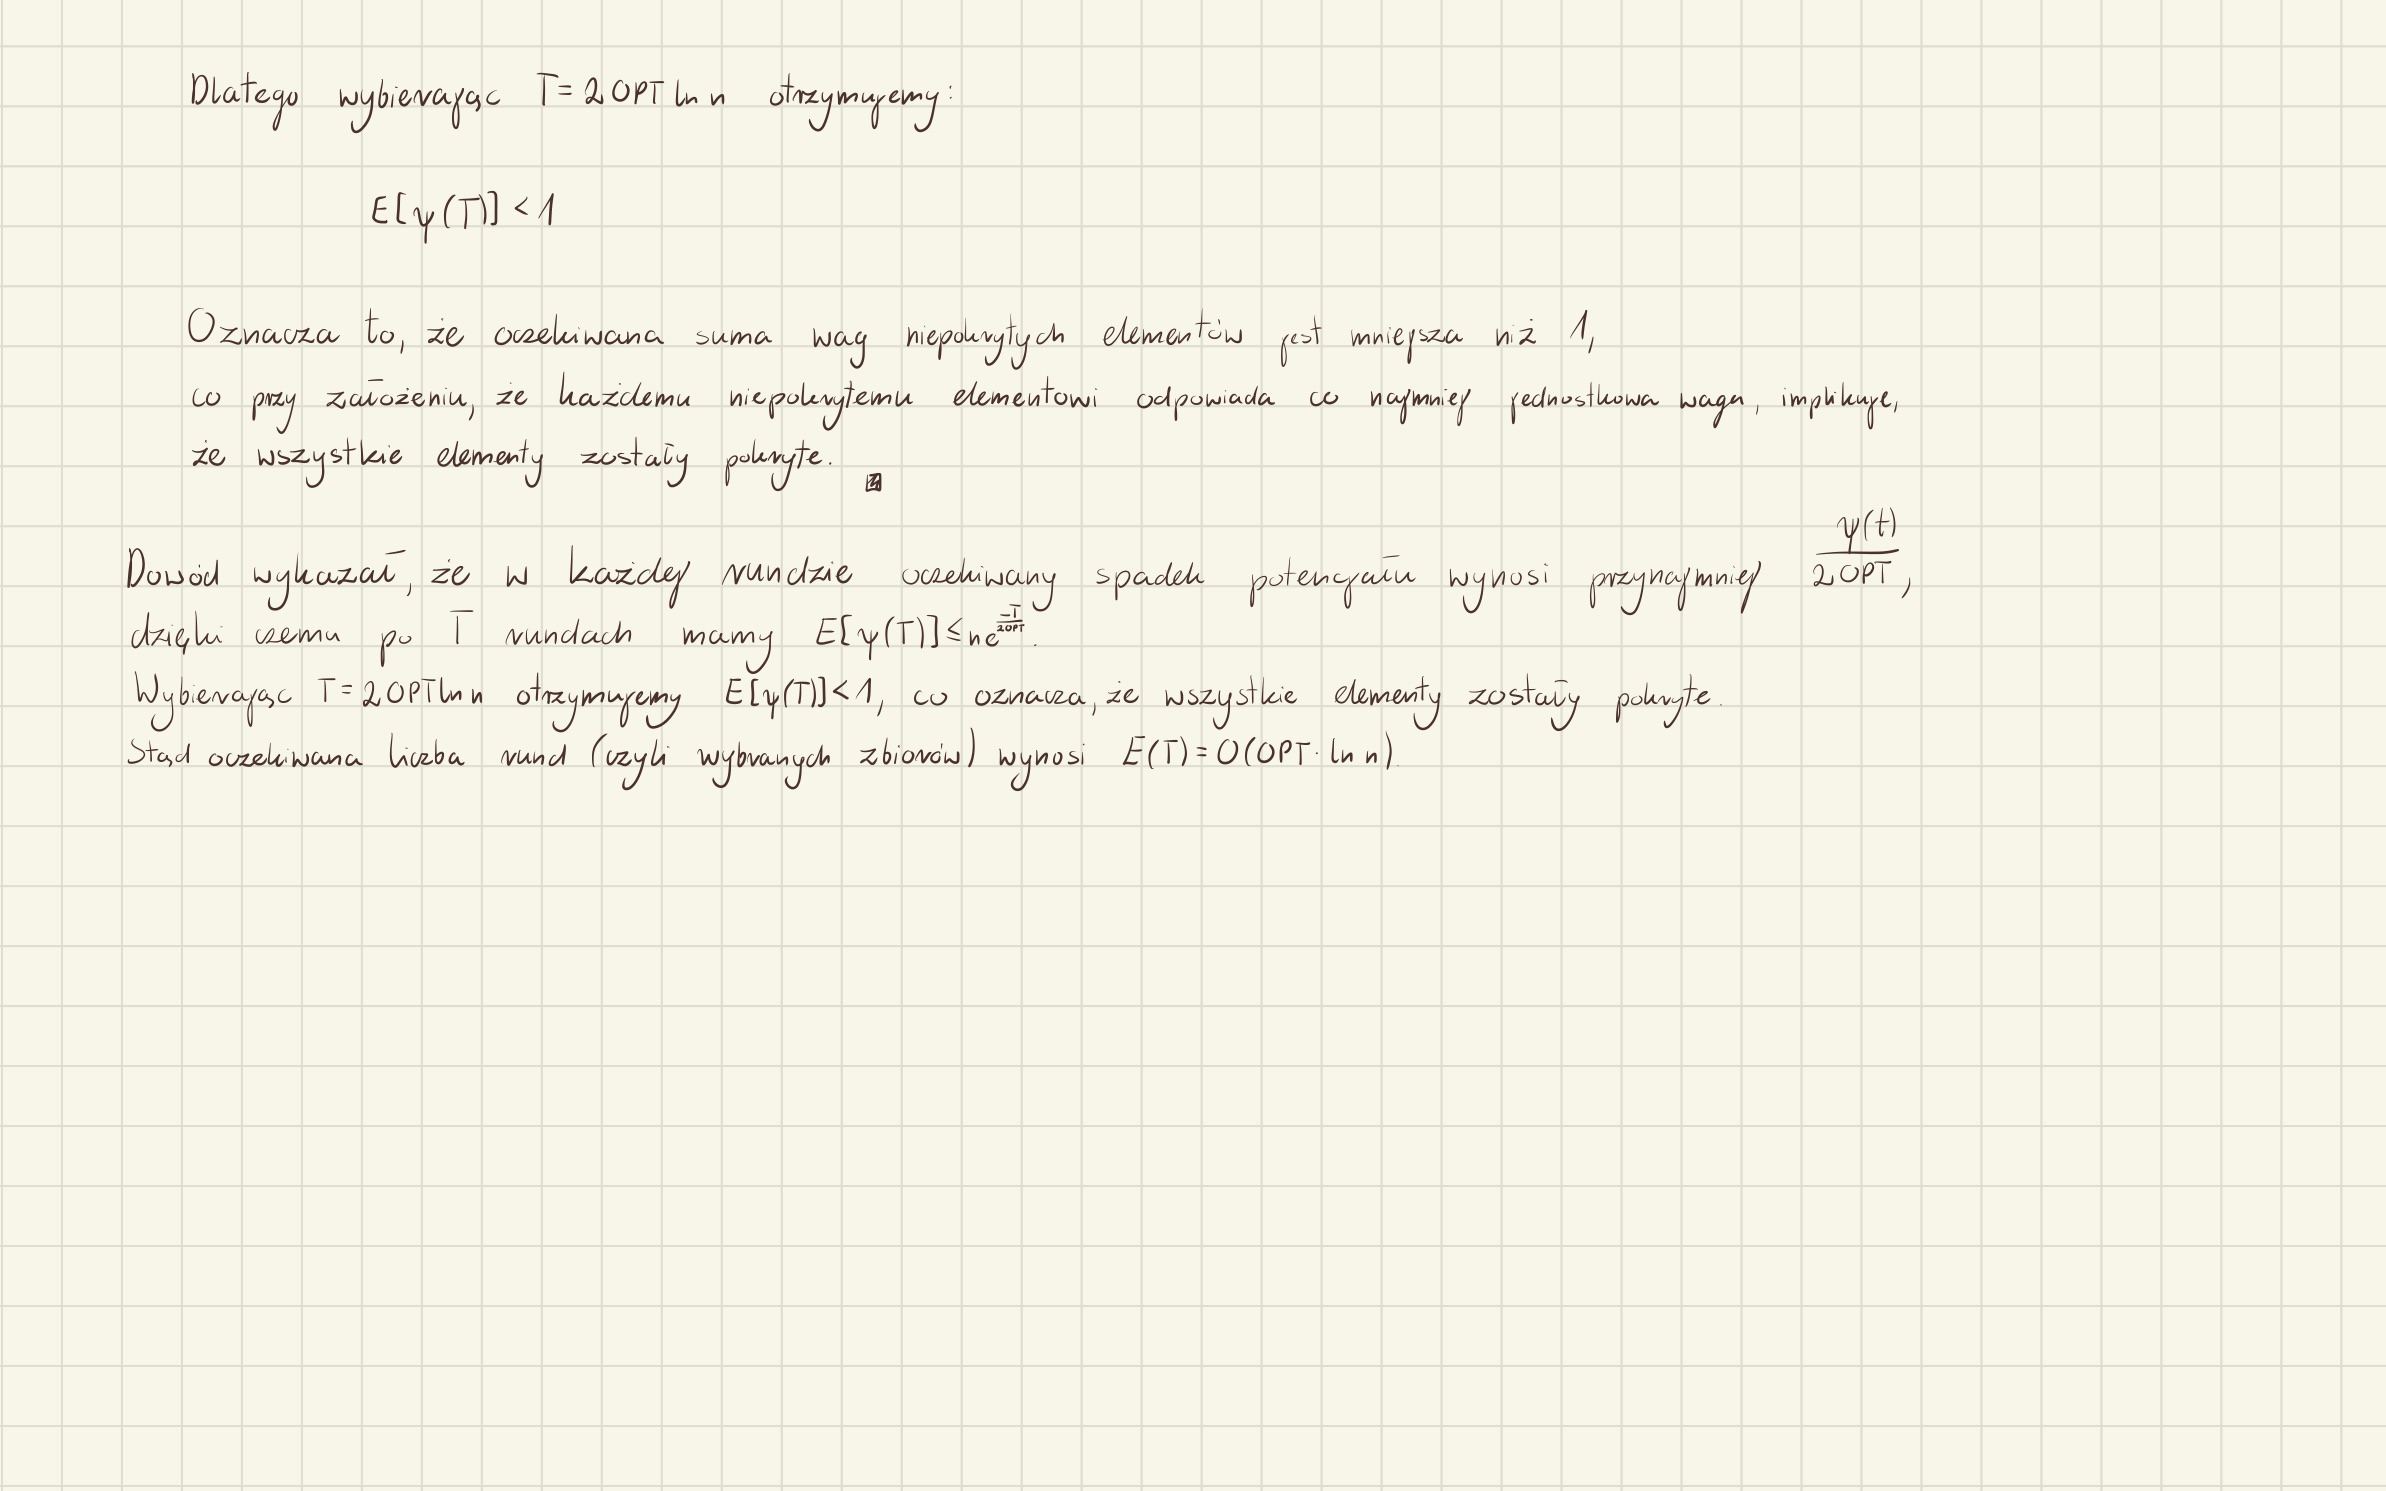